# Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import DBSCAN
from sklearn.decomposition import NMF

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


from docx import Document
from docx.shared import Inches

In [ ]:
#function for replacing cell values in each column for cleaning

def replace_column_values(df, column_names):
    for column_name in column_names:
        # Get the unique values in the specified column
        unique_values = df[column_name].unique()
        # Initialize an empty dictionary to store the original and replacement values
        value_map = {}
        # Loop through each unique value and ask the user for a replacement value
        for value in unique_values:
            replacement_value = input(f"Replace '{value}' in column '{column_name}' with: ")
            value_map[value] = replacement_value
            df.loc[df[column_name] == value, column_name] = replacement_value
        # Print the dictionary of original and replacement values for this column
        print(f"Value map for column '{column_name}': {value_map}")
    return df

#function for showing unique values and frequencies

def print_unique_valuefrq(df):
    # Loop through each column in the DataFrame
    for col in df.columns:
        # Get the unique values and their frequency using value_counts
        value_counts = df[col].value_counts()
        # Print the column name
        print(f"Column '{col}':")
        # Loop through each unique value and its frequency
        for value, count in value_counts.items():
            print(f"  {value}: {count}")
        # Print a blank line for spacing
        print()


#following func is from github of ashishthomaschempolil/remove_corr_var.py
def remove_corr_var(train=X_train,test=X_test,target_threshold = 10**-3,within_threshold=0.95):
  """
  Remove correlated features that have low correlation with target 
  and have high correlation with each other (keeping one)
  """
  #removing all low correlated variables with target
  initial_feature = train.shape[1]
  corr = train.drop("ID",axis=1).corr().abs()
  corr_target = pd.DataFrame(corr['TARGET']).sort_values(by='TARGET')
  threshold=target_threshold
  feat_df =corr_target[(corr_target['TARGET'])<=threshold]
  print("There are %i features that have a correlation values less than %.3f with 'TARGET'. We will remove all of this."\
        %(feat_df.shape[0],threshold))
  print("Removing.........")
  for df in [train,test]:
    df.drop(feat_df.index,axis=1,inplace=True)


  #removing highly correlated features(keeping one)
  #https://www.dezyre.com/recipes/drop-out-highly-correlated-features-in-python
  corr.drop('TARGET',axis=1,inplace=True)
  corr.drop('TARGET',axis=0,inplace=True)
  corr.drop(feat_df.index,axis=1,inplace=True)
  corr.drop(feat_df.index,inplace=True)
  threshold = within_threshold
  upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)) #getting upper traingle of correlation matrix
  column = [col for col in upper.columns if any(upper[col]>threshold)] #getting all columns that have high correlation with one of the features
  print("There are %i features that have high correlation with another feature with threshold being kept as %.3f and above. We will remove all of this."\
        %(len(column),threshold))
  print("Removing.........")
  for df in [train,test]:
    df.drop(column,axis=1,inplace=True)
  print("The features were changed from %i to %i. %i features were removed."%(initial_feature,train.shape[1],initial_feature-train.shape[1]))


# Cleaning and Merging

### Reading and Cleaning GeneExp Dataset

In [ ]:
file_directory=r"Data\VFDB.xlsx"
df_gen=pd.read_excel(file_directory)
#print_unique_valuefrq(df_gen)
df_gen=df_gen.replace({'yes':1, 'no':0})
print_unique_valuefrq(df_gen)

Column 'name':
  1022: 1
  OC-691: 1
  OC-561: 1
  OC-562: 1
  OC-571: 1
  OC-576: 1
  OC-585: 1
  OC-601: 1
  OC-611: 1
  OC-630: 1
  OC-639: 1
  OC-652: 1
  OC-661: 1
  OC-664: 1
  OC-681: 1
  OC-689: 1
  OC-702: 1
  OC-808: 1
  OC-722: 1
  OC-731: 1
  OC-737: 1
  OC-739: 1
  OC-743: 1
  OC-748: 1
  OC-751: 1
  OC-770: 1
  OC-776: 1
  OC-793: 1
  OC-795: 1
  OC-796: 1
  OC-803: 1
  OC-805: 1
  OC-557: 1
  OC-546: 1
  OC-543: 1
  OC-542: 1
  OC-282: 1
  OC-283: 1
  OC-287: 1
  OC-291: 1
  OC-309: 1
  OC-30: 1
  OC-314: 1
  OC-348: 1
  OC-353: 1
  OC-358: 1
  OC-359: 1
  OC-364: 1
  OC-373: 1
  OC-375: 1
  OC-3: 1
  OC-427: 1
  OC-442: 1
  OC-443: 1
  OC-454: 1
  OC-457: 1
  OC-467: 1
  OC-468: 1
  OC-473: 1
  OC-474: 1
  OC-485: 1
  OC-494: 1
  OC-4: 1
  OC-505: 1
  OC-528: 1
  OC-806: 1
  OC-80: 1
  OC-263: 1
  S-66: 1
  S-31: 1
  S-35: 1
  S-38: 1
  S-3: 1
  S-43: 1
  S-45: 1
  S-47: 1
  S-49: 1
  S-50: 1
  S-54: 1
  S-57: 1
  S-5: 1
  S-61: 1
  S-65: 1
  S-67: 1
  OC-810: 1
  S-6: 

### Reading and Cleaning Patient Dataset

In [ ]:
file_directory2=r"Data\Updated H. pylori MetaData.xlsx"
df_pts=pd.read_excel(file_directory2)
print_unique_valuefrq(df_pts)

Column 'Strain ID':
  OC-30: 1
  OC-542: 1
  OC-528: 1
  OC-601: 1
  OC-691: 1
  OC-1110: 1
  OC-1065: 1
  1022: 1
  OC-1127: 1
  OC-1112: 1
  OC-795: 1
  OC-944: 1
  OC-854: 1
  OC-816: 1
  OC-939: 1
  OC-443: 1
  OC-971: 1
  OC-457: 1
  OC-936: 1
  OC-910: 1
  OC-963: 1
  OC-1107: 1
  HC-256: 1
  OC-454: 1
  OC-813: 1
  OC-806: 1
  OC-664: 1
  OC-543: 1
  OC-611: 1
  HC-255: 1
  OC-373: 1
  OC-1116: 1
  1027: 1
  1032: 1
  1034: 1
  1036: 1
  HC-730: 1
  OC-897: 1
  OC-846: 1
  OC-840: 1
  OC-819: 1
  OC-814: 1
  OC-810: 1
  OC-808: 1
  OC-805: 1
  OC-803: 1
  OC-975: 1
  OC-937: 1
  OC-913: 1
  OC-912: 1
  OC-953: 1
  OC-947: 1
  OC-945: 1
  OC-1031: 1
  OC-1028: 1
  OC-1021: 1
  OC-1094: 1
  OC-1062: 1
  OC-1051: 1
  OC-1047: 1
  OC-1046: 1
  OC-1005: 1
  1045: 1
  1043: 1
  1038: 1
  OC-652: 1
  OC-561: 1
  732: 1
  15-C: 1
  S-67: 1
  S-73: 1
  S-75: 1
  S-77: 1
  S-78: 1
  S-79: 1
  S-80: 1
  S-82: 1
  S-84: 1
  S-85: 1
  S-91: 1
  S-97: 1
  S-99: 1
  S-104: 1
  19-A: 1
  OC-546

In [ ]:
#replace_column_values(df_pts, ["Patient Sex"])
#Value map for column 'Patient Sex': {'Male': '1', 'Female': '0'}
df_pts['Patient Sex'] = df_pts['Patient Sex'].replace({'Male': '1', 'Female': '0'})
df_pts

Strain ID  Patient Age Patient Sex      Clinical Diagnosis  \
0       OC-30           56           1               Gastritis   
1       OC-15           52           1               Gastritis   
2       HC-70           55           0    Peptic Ulcer Disease   
3        OC-4           58           0               Gastritis   
4       OC-81           54           0  Gastritis + Duodenitis   
..        ...          ...         ...                     ...   
262      58-A           42           1    Gastritis + Carditis   
263      58-C           42           1    Gastritis + Carditis   
264      59-B           43           0    Gastritis + Carditis   
265      72-B           55           0    Gastritis + Carditis   
266      73-B           32           1    Gastritis + Carditis   

    Clinical Classification Gastric Biopsy    Ethnicity  \
0                       NUD         Antrum         Fars   
1                       NUD         Antrum         Fars   
2                       PUD         Antrum         Turk   
3                       NUD         Antrum         Fars   
4                       NUD         Antrum  Mazandarani   
..                      ...            ...          ...   
262                     NUD         Antrum       Afghan   
263                     NUD         Cardia       Afghan   
264                     NUD           Body         Fars   
265                     NUD           Body          Lor   
266                     NUD           Body         Fars   

    Province (Geographical Origin) Clarithromycin Metronidazole Tetracycline  \
0                           Semnan              S             R            S   
1                           Tehran              R             S            S   
2                          Ardabil              R             R            R   
3                           Tehran              R             R            S   
4                       Mazandaran              R             R            R   
..                             ...            ...           ...          ...   
262                     Mazandaran              S             R            S   
263                     Mazandaran              S             R            S   
264                         Tehran              S             S            S   
265                      Lorestan               R             R            S   
266                         Tehran              R             S            S   

    Amoxicillin Ciprofloxacin Levofloxacin Rifampicin   
0             S             S            S           S  
1             R             S            S           S  
2             S             R            S           R  
3             S             R            R           R  
4             S             R            R           R  
..          ...           ...          ...         ...  
262           S             R            R           R  
263           S             R            R           R  
264           S             S            S           R  
265           R             R            R           R  
266           R             R            R           S  

[267 rows x 15 columns]

In [ ]:
#replace_column_values(df_pts, ['Clarithromycin','Metronidazole','Tetracycline','Amoxicillin','Ciprofloxacin', 'Levofloxacin', 'Rifampicin '])
#Value map for column 'Clarithromycin': {'S': '0', 'R': '1'}
#Value map for column 'Metronidazole': {'R': '1', 'S': '0'}
#Value map for column 'Tetracycline': {'S': '0', 'R': '1'}
#Value map for column 'Amoxicillin': {'S': '0', 'R': '1'}
#Value map for column 'Ciprofloxacin': {'S': '0', 'R': '1'}
#Value map for column 'Levofloxacin': {'S': '0', 'R': '1'}
#Value map for column 'Rifampicin ': {'S': '0', 'R': '1'}

df_pts['Clarithromycin']=df_pts['Clarithromycin'].replace({'S':0,'R':1})
df_pts['Metronidazole']=df_pts['Metronidazole'].replace({'S':0,'R':1})
df_pts['Tetracycline']=df_pts['Tetracycline'].replace({'S':0,'R':1})
df_pts['Amoxicillin']=df_pts['Amoxicillin'].replace({'S':0,'R':1})
df_pts['Ciprofloxacin']=df_pts['Ciprofloxacin'].replace({'S':0,'R':1})
df_pts['Levofloxacin']=df_pts['Levofloxacin'].replace({'S':0,'R':1})
df_pts['Rifampicin ']=df_pts['Rifampicin '].replace({'S':0,'R':1})
df_pts

Strain ID  Patient Age Patient Sex      Clinical Diagnosis  \
0       OC-30           56           1               Gastritis   
1       OC-15           52           1               Gastritis   
2       HC-70           55           0    Peptic Ulcer Disease   
3        OC-4           58           0               Gastritis   
4       OC-81           54           0  Gastritis + Duodenitis   
..        ...          ...         ...                     ...   
262      58-A           42           1    Gastritis + Carditis   
263      58-C           42           1    Gastritis + Carditis   
264      59-B           43           0    Gastritis + Carditis   
265      72-B           55           0    Gastritis + Carditis   
266      73-B           32           1    Gastritis + Carditis   

    Clinical Classification Gastric Biopsy    Ethnicity  \
0                       NUD         Antrum         Fars   
1                       NUD         Antrum         Fars   
2                       PUD         Antrum         Turk   
3                       NUD         Antrum         Fars   
4                       NUD         Antrum  Mazandarani   
..                      ...            ...          ...   
262                     NUD         Antrum       Afghan   
263                     NUD         Cardia       Afghan   
264                     NUD           Body         Fars   
265                     NUD           Body          Lor   
266                     NUD           Body         Fars   

    Province (Geographical Origin)  Clarithromycin  Metronidazole  \
0                           Semnan               0              1   
1                           Tehran               1              0   
2                          Ardabil               1              1   
3                           Tehran               1              1   
4                       Mazandaran               1              1   
..                             ...             ...            ...   
262                     Mazandaran               0              1   
263                     Mazandaran               0              1   
264                         Tehran               0              0   
265                      Lorestan                1              1   
266                         Tehran               1              0   

     Tetracycline  Amoxicillin  Ciprofloxacin  Levofloxacin  Rifampicin   
0               0            0              0             0            0  
1               0            1              0             0            0  
2               1            0              1             0            1  
3               0            0              1             1            1  
4               1            0              1             1            1  
..            ...          ...            ...           ...          ...  
262             0            0              1             1            1  
263             0            0              1             1            1  
264             0            0              0             0            1  
265             0            1              1             1            1  
266             0            1              1             1            0  

[267 rows x 15 columns]

In [ ]:
# I just extracted PUD and gastritis (including gastritis and dudonitis) from the clinical classification and diagnosis.
df_pts['PUD']=df_pts['Clinical Classification']
df_pts['GIitis']=df_pts['Clinical Diagnosis']

#replace_column_values(df_pts,['PUD','GIitis'])
#Value map for column 'PUD': {'NUD': '0', 'PUD': '1', 'IM': '0', 'GC': '0', 'Normal (Healthy)': '0', 'GORD (GERD)': '0', "Barrett's Esophagus ": '0'}
#Value map for column 'GIitis': {'Gastritis': '1', 'Peptic Ulcer Disease': '0', 'Gastritis + Duodenitis': '1', 'Intestinal Metaplasia': '0', 'Gastric Cancer': '0', 'Gastric Ulcer': '0', 'Esophagitis': '1', 'Non-Ulcer Dyspepsia': '0', 'Gastric Ulcer + Duodenal Ulcer': '0', 'Duodenitis': '1', 'Duodenal Ulcer': '0', 'Normal (Healthy)': '0', ' Intestinal Metaplasia': '0', 'Gastroesophageal Reflux Disease': '0', "Barrett's Esophagus ": '0', 'Gastritis + Carditis': '1'}
df_pts['PUD']=df_pts['PUD'].replace({'NUD': '0', 'PUD': '1', 'IM': '0', 'GC': '0', 'Normal (Healthy)': '0', 'GORD (GERD)': '0', "Barrett's Esophagus ": '0'})
df_pts['GIitis']=df_pts['GIitis'].replace({'Gastritis': '1', 'Peptic Ulcer Disease': '0', 'Gastritis + Duodenitis': '1', 'Intestinal Metaplasia': '0', 'Gastric Cancer': '0', 'Gastric Ulcer': '0', 'Esophagitis': '1', 'Non-Ulcer Dyspepsia': '0', 'Gastric Ulcer + Duodenal Ulcer': '0', 'Duodenitis': '1', 'Duodenal Ulcer': '0', 'Normal (Healthy)': '0', ' Intestinal Metaplasia': '0', 'Gastroesophageal Reflux Disease': '0', "Barrett's Esophagus ": '0', 'Gastritis + Carditis': '1'})
df_pts

Strain ID  Patient Age Patient Sex      Clinical Diagnosis  \
0       OC-30           56           1               Gastritis   
1       OC-15           52           1               Gastritis   
2       HC-70           55           0    Peptic Ulcer Disease   
3        OC-4           58           0               Gastritis   
4       OC-81           54           0  Gastritis + Duodenitis   
..        ...          ...         ...                     ...   
262      58-A           42           1    Gastritis + Carditis   
263      58-C           42           1    Gastritis + Carditis   
264      59-B           43           0    Gastritis + Carditis   
265      72-B           55           0    Gastritis + Carditis   
266      73-B           32           1    Gastritis + Carditis   

    Clinical Classification Gastric Biopsy    Ethnicity  \
0                       NUD         Antrum         Fars   
1                       NUD         Antrum         Fars   
2                       PUD         Antrum         Turk   
3                       NUD         Antrum         Fars   
4                       NUD         Antrum  Mazandarani   
..                      ...            ...          ...   
262                     NUD         Antrum       Afghan   
263                     NUD         Cardia       Afghan   
264                     NUD           Body         Fars   
265                     NUD           Body          Lor   
266                     NUD           Body         Fars   

    Province (Geographical Origin)  Clarithromycin  Metronidazole  \
0                           Semnan               0              1   
1                           Tehran               1              0   
2                          Ardabil               1              1   
3                           Tehran               1              1   
4                       Mazandaran               1              1   
..                             ...             ...            ...   
262                     Mazandaran               0              1   
263                     Mazandaran               0              1   
264                         Tehran               0              0   
265                      Lorestan                1              1   
266                         Tehran               1              0   

     Tetracycline  Amoxicillin  Ciprofloxacin  Levofloxacin  Rifampicin  PUD  \
0               0            0              0             0            0   0   
1               0            1              0             0            0   0   
2               1            0              1             0            1   1   
3               0            0              1             1            1   0   
4               1            0              1             1            1   0   
..            ...          ...            ...           ...          ...  ..   
262             0            0              1             1            1   0   
263             0            0              1             1            1   0   
264             0            0              0             0            1   0   
265             0            1              1             1            1   0   
266             0            1              1             1            0   0   

    GIitis  
0        1  
1        1  
2        0  
3        1  
4        1  
..     ...  
262      1  
263      1  
264      1  
265      1  
266      1  

[267 rows x 17 columns]

In [ ]:
#replace_column_values(df_pts,['Ethnicity'])
#Value map for column 'Ethnicity': {'Fars': '1', 'Turk': '3', 'Mazandarani': '2', 'Lor': '0', 'Kurd': '0', 'Gilak': '0', 'Afghan': '0', 'Baloch ': '0'}
df_pts['Ethnicity']=df_pts['Ethnicity'].replace({'Fars': '1', 'Turk': '3', 'Mazandarani': '2', 'Lor': '0', 'Kurd': '0', 'Gilak': '0', 'Afghan': '0', 'Baloch ': '0'})
df_pts

Strain ID  Patient Age Patient Sex      Clinical Diagnosis  \
0       OC-30           56           1               Gastritis   
1       OC-15           52           1               Gastritis   
2       HC-70           55           0    Peptic Ulcer Disease   
3        OC-4           58           0               Gastritis   
4       OC-81           54           0  Gastritis + Duodenitis   
..        ...          ...         ...                     ...   
262      58-A           42           1    Gastritis + Carditis   
263      58-C           42           1    Gastritis + Carditis   
264      59-B           43           0    Gastritis + Carditis   
265      72-B           55           0    Gastritis + Carditis   
266      73-B           32           1    Gastritis + Carditis   

    Clinical Classification Gastric Biopsy Ethnicity  \
0                       NUD         Antrum         1   
1                       NUD         Antrum         1   
2                       PUD         Antrum         3   
3                       NUD         Antrum         1   
4                       NUD         Antrum         2   
..                      ...            ...       ...   
262                     NUD         Antrum         0   
263                     NUD         Cardia         0   
264                     NUD           Body         1   
265                     NUD           Body         0   
266                     NUD           Body         1   

    Province (Geographical Origin)  Clarithromycin  Metronidazole  \
0                           Semnan               0              1   
1                           Tehran               1              0   
2                          Ardabil               1              1   
3                           Tehran               1              1   
4                       Mazandaran               1              1   
..                             ...             ...            ...   
262                     Mazandaran               0              1   
263                     Mazandaran               0              1   
264                         Tehran               0              0   
265                      Lorestan                1              1   
266                         Tehran               1              0   

     Tetracycline  Amoxicillin  Ciprofloxacin  Levofloxacin  Rifampicin  PUD  \
0               0            0              0             0            0   0   
1               0            1              0             0            0   0   
2               1            0              1             0            1   1   
3               0            0              1             1            1   0   
4               1            0              1             1            1   0   
..            ...          ...            ...           ...          ...  ..   
262             0            0              1             1            1   0   
263             0            0              1             1            1   0   
264             0            0              0             0            1   0   
265             0            1              1             1            1   0   
266             0            1              1             1            0   0   

    GIitis  
0        1  
1        1  
2        0  
3        1  
4        1  
..     ...  
262      1  
263      1  
264      1  
265      1  
266      1  

[267 rows x 17 columns]

In [ ]:
df_pts=df_pts.drop(columns=['Province (Geographical Origin)', 'Gastric Biopsy', 'Clinical Diagnosis', 'Clinical Classification'])
print_unique_valuefrq(df_pts)

Column 'Strain ID':
  OC-30: 1
  OC-542: 1
  OC-528: 1
  OC-601: 1
  OC-691: 1
  OC-1110: 1
  OC-1065: 1
  1022: 1
  OC-1127: 1
  OC-1112: 1
  OC-795: 1
  OC-944: 1
  OC-854: 1
  OC-816: 1
  OC-939: 1
  OC-443: 1
  OC-971: 1
  OC-457: 1
  OC-936: 1
  OC-910: 1
  OC-963: 1
  OC-1107: 1
  HC-256: 1
  OC-454: 1
  OC-813: 1
  OC-806: 1
  OC-664: 1
  OC-543: 1
  OC-611: 1
  HC-255: 1
  OC-373: 1
  OC-1116: 1
  1027: 1
  1032: 1
  1034: 1
  1036: 1
  HC-730: 1
  OC-897: 1
  OC-846: 1
  OC-840: 1
  OC-819: 1
  OC-814: 1
  OC-810: 1
  OC-808: 1
  OC-805: 1
  OC-803: 1
  OC-975: 1
  OC-937: 1
  OC-913: 1
  OC-912: 1
  OC-953: 1
  OC-947: 1
  OC-945: 1
  OC-1031: 1
  OC-1028: 1
  OC-1021: 1
  OC-1094: 1
  OC-1062: 1
  OC-1051: 1
  OC-1047: 1
  OC-1046: 1
  OC-1005: 1
  1045: 1
  1043: 1
  1038: 1
  OC-652: 1
  OC-561: 1
  732: 1
  15-C: 1
  S-67: 1
  S-73: 1
  S-75: 1
  S-77: 1
  S-78: 1
  S-79: 1
  S-80: 1
  S-82: 1
  S-84: 1
  S-85: 1
  S-91: 1
  S-97: 1
  S-99: 1
  S-104: 1
  19-A: 1
  OC-546

### Merging (Patients&GenExp) and Target

In [ ]:
df=pd.merge(df_pts, df_gen, how="inner", left_on='Strain ID', right_on='name')
print(df.columns)
df

Index(['Strain ID', 'Patient Age', 'Patient Sex', 'Ethnicity',
       'Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin',
       'Ciprofloxacin', 'Levofloxacin',
       ...
       'virB2_cagC', 'virB4_cagE', 'virB5_cagL', 'virB6_cagW', 'virB7_cagT',
       'virB8_cagV', 'virB9_cagX', 'virD4_cag5', 'wbcJ', 'ylxH'],
      dtype='object', length=165)


Strain ID  Patient Age Patient Sex Ethnicity  Clarithromycin  \
0       OC-30           56           1         1               0   
1       OC-15           52           1         1               1   
2       HC-70           55           0         3               1   
3        OC-4           58           0         1               1   
4       OC-81           54           0         2               1   
..        ...          ...         ...       ...             ...   
262      58-A           42           1         0               0   
263      58-C           42           1         0               0   
264      59-B           43           0         1               0   
265      72-B           55           0         0               1   
266      73-B           32           1         1               1   

     Metronidazole  Tetracycline  Amoxicillin  Ciprofloxacin  Levofloxacin  \
0                1             0            0              0             0   
1                0             0            1              0             0   
2                1             1            0              1             0   
3                1             0            0              1             1   
4                1             1            0              1             1   
..             ...           ...          ...            ...           ...   
262              1             0            0              1             1   
263              1             0            0              1             1   
264              0             0            0              0             0   
265              1             0            1              1             1   
266              0             0            1              1             1   

     ...  virB2_cagC virB4_cagE virB5_cagL virB6_cagW  virB7_cagT  virB8_cagV  \
0    ...           1          1          1          1           1           1   
1    ...           1          1          1          1           1           1   
2    ...           0          0          0          0           0           0   
3    ...           1          1          1          1           1           1   
4    ...           1          1          1          1           1           1   
..   ...         ...        ...        ...        ...         ...         ...   
262  ...           1          1          1          1           1           1   
263  ...           1          1          1          1           1           1   
264  ...           1          1          1          1           1           1   
265  ...           1          1          1          1           1           1   
266  ...           1          1          1          1           1           1   

     virB9_cagX  virD4_cag5  wbcJ  ylxH  
0             1           1     1     1  
1             1           1     1     1  
2             0           0     1     1  
3             0           1     1     1  
4             1           1     1     1  
..          ...         ...   ...   ...  
262           1           1     1     1  
263           1           1     1     1  
264           1           1     1     1  
265           1           1     1     1  
266           1           1     1     1  

[267 rows x 165 columns]

In [ ]:
df=df.drop(columns=['Strain ID', 'name'])

y=df.loc[:,['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin',
            'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']]
X=df.drop(columns=['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin',
                   'Ciprofloxacin', 'Levofloxacin', 'Rifampicin '])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Dimensionality Reduction and Clustering

### PCA

                  PC1       PC2       PC3
Patient Age -0.044242 -0.050743 -0.066034
Patient Sex -0.043097  0.082924  0.103409
Ethnicity   -0.034655  0.062390 -0.025199
PUD         -0.077397 -0.005377 -0.001305
GIitis       0.143807 -0.014001  0.007683
...               ...       ...       ...
virB8_cagV  -0.827415  0.496036 -0.062608
virB9_cagX  -0.812624  0.488260 -0.062152
virD4_cag5  -0.812221  0.498746 -0.065802
wbcJ        -0.394782 -0.548341  0.041827
ylxH        -0.108457 -0.102867  0.101174

[156 rows x 3 columns]


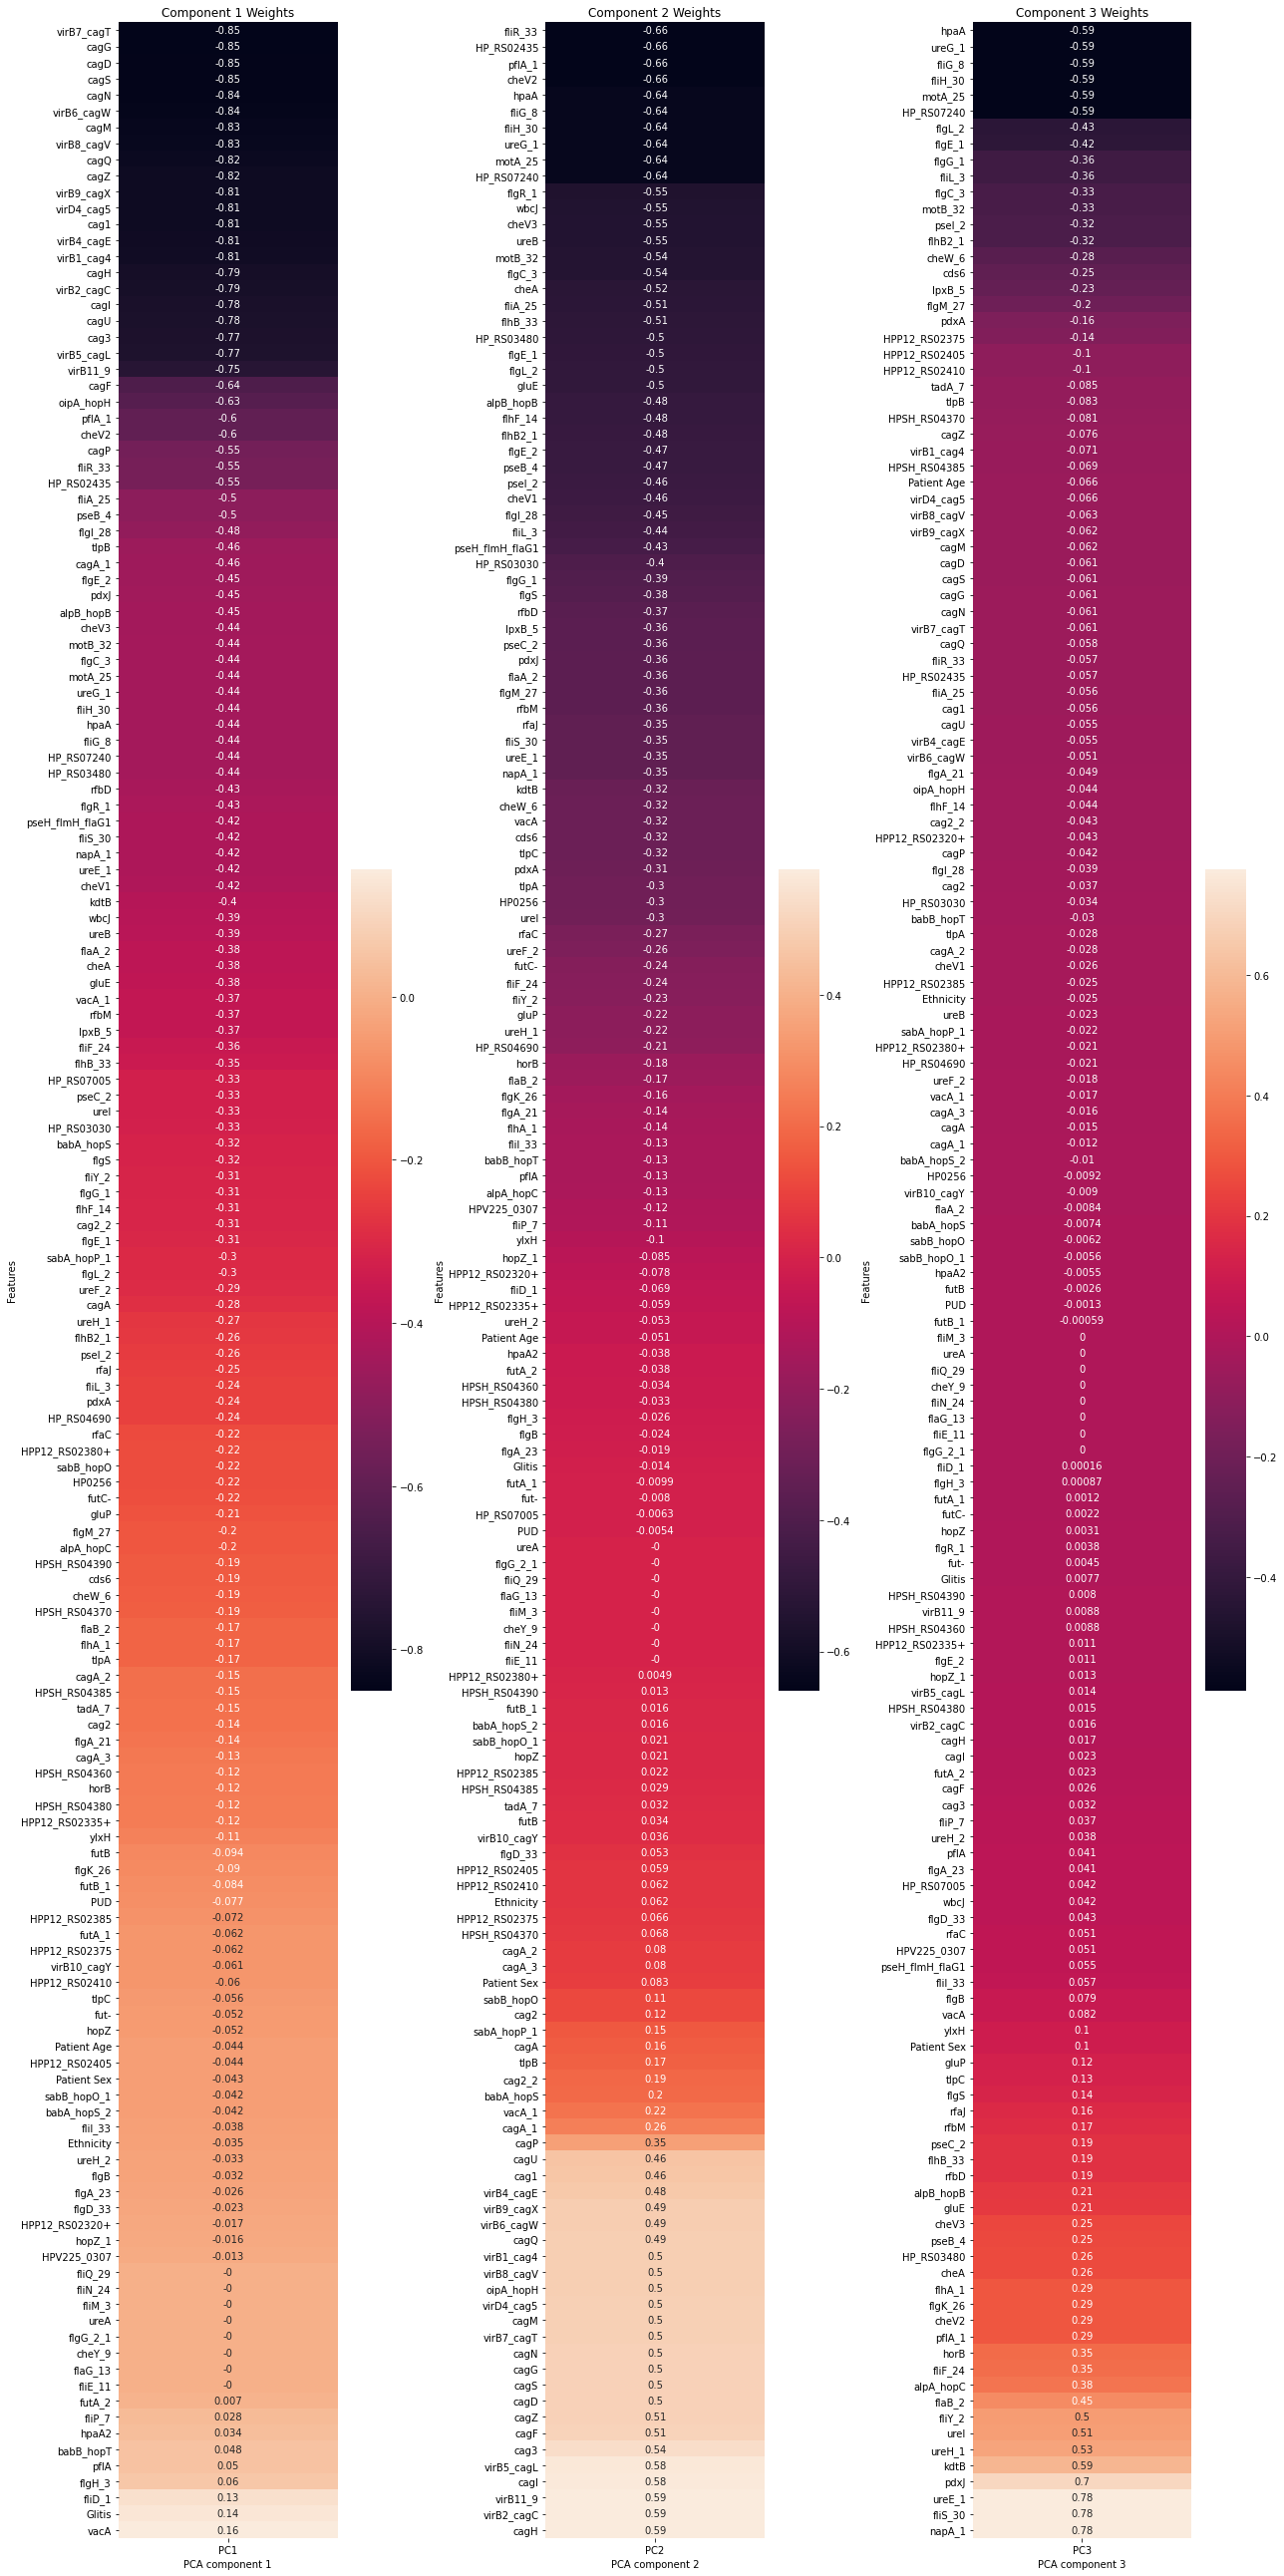

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca = pca.fit(X_scaled)
weights = pca.components_.T * np.sqrt(pca.explained_variance_)
weights.shape
weights_df = pd.DataFrame(weights, columns=['PC1', 'PC2', 'PC3'], index=X.columns[:])
print(weights_df)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 36))

sns.heatmap(weights_df.iloc[:,0:1].sort_values(by="PC1"), annot=True,  ax=axs[0])
axs[0].set_title('Component 1 Weights')
axs[0].set_xlabel('PCA component 1')
axs[0].set_ylabel('Features')

sns.heatmap(weights_df.iloc[:,1:2].sort_values(by="PC2"), annot=True, ax=axs[1])
axs[1].set_title('Component 2 Weights')
axs[1].set_xlabel('PCA component 2')
axs[1].set_ylabel('Features')

sns.heatmap(weights_df.iloc[:,2:3].sort_values(by="PC3"), annot=True, ax=axs[2])
axs[2].set_title('Component 3 Weights')
axs[2].set_xlabel('PCA component 3')
axs[2].set_ylabel('Features')

plt.tight_layout()
plt.show()


In [ ]:
pca = PCA(n_components=3)
pca = pca.fit_transform(X_scaled)
X_reduced = pca[:, :3]

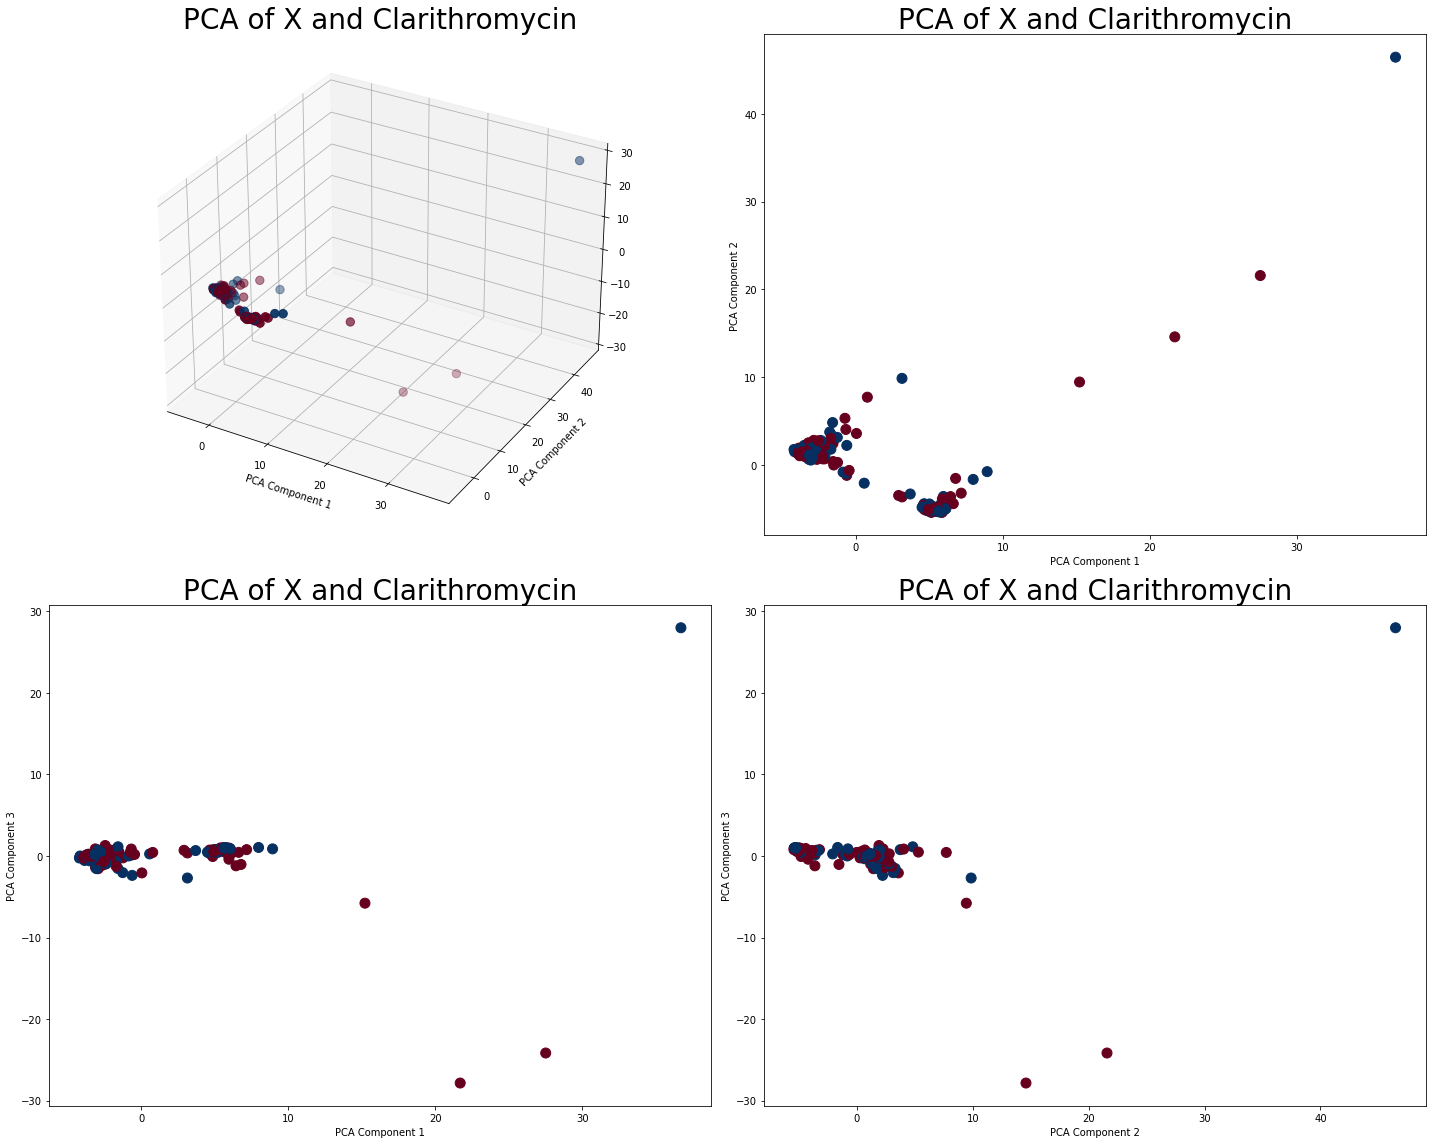

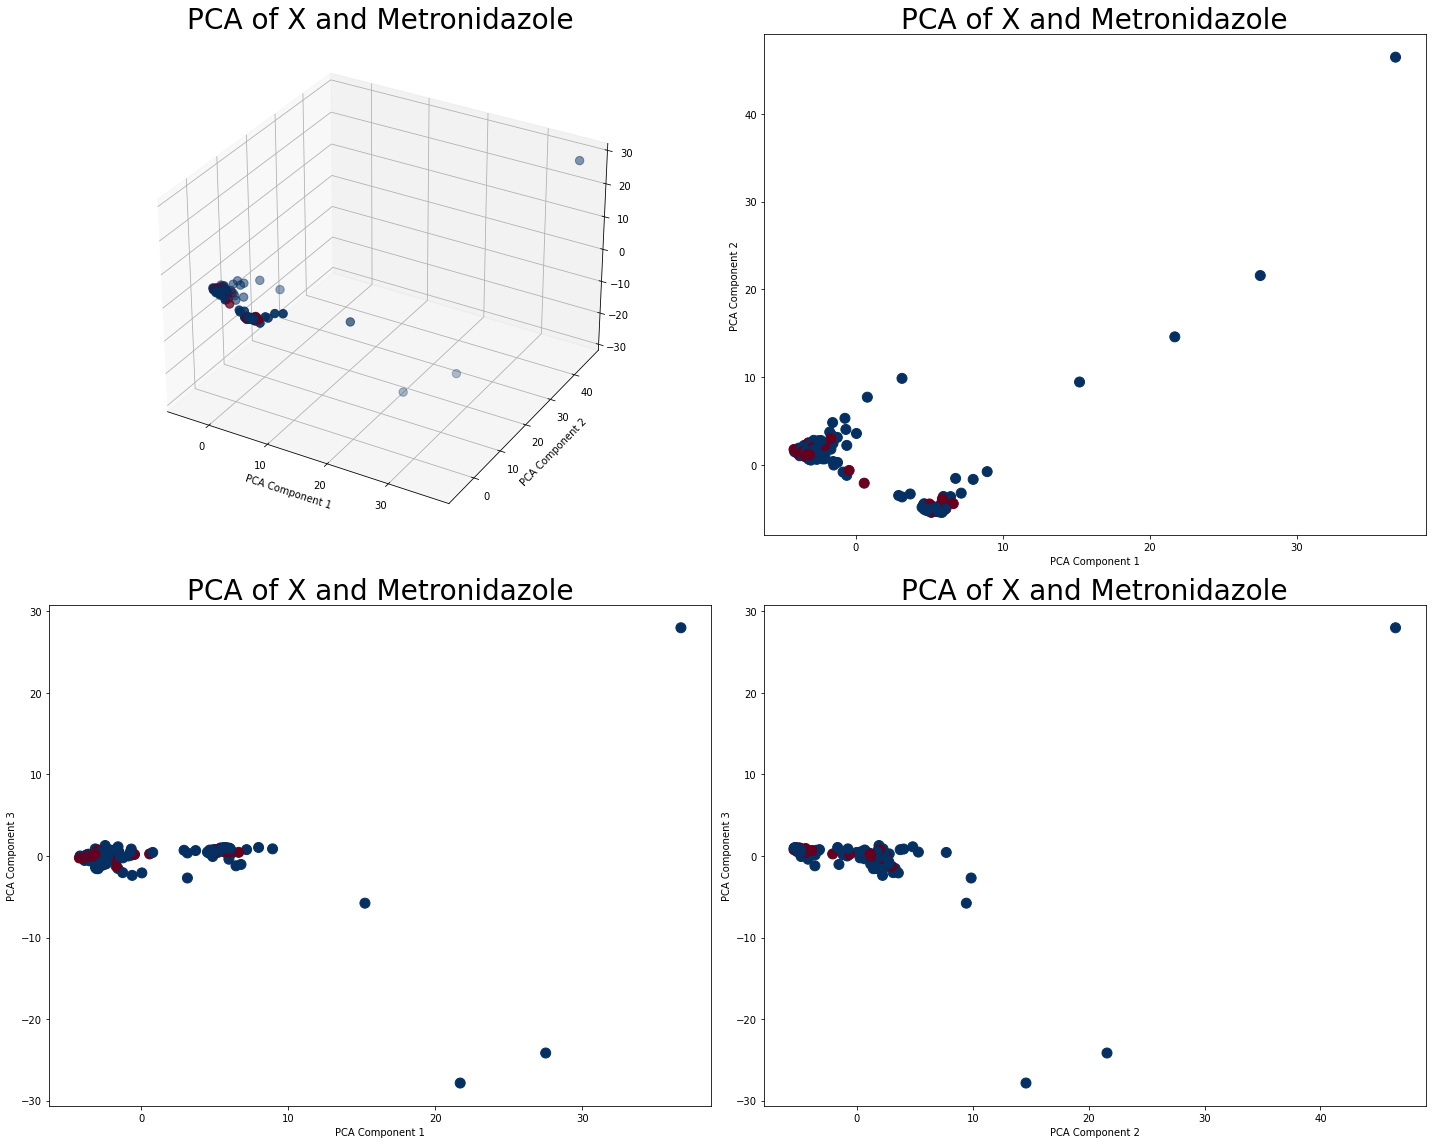

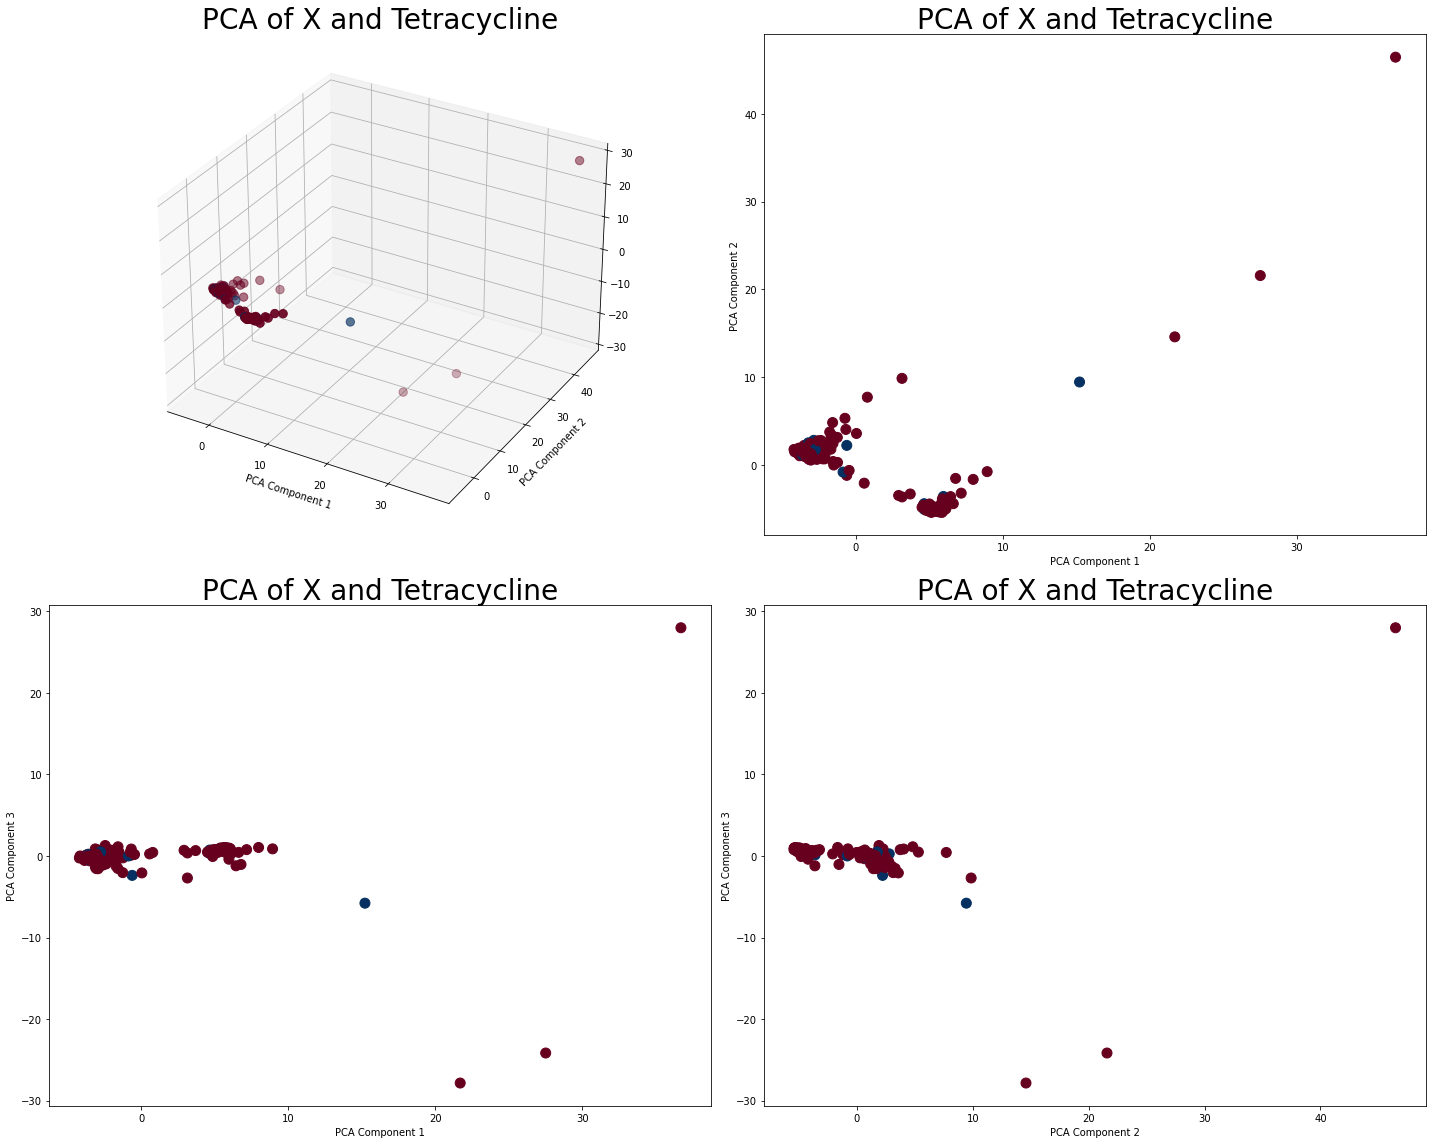

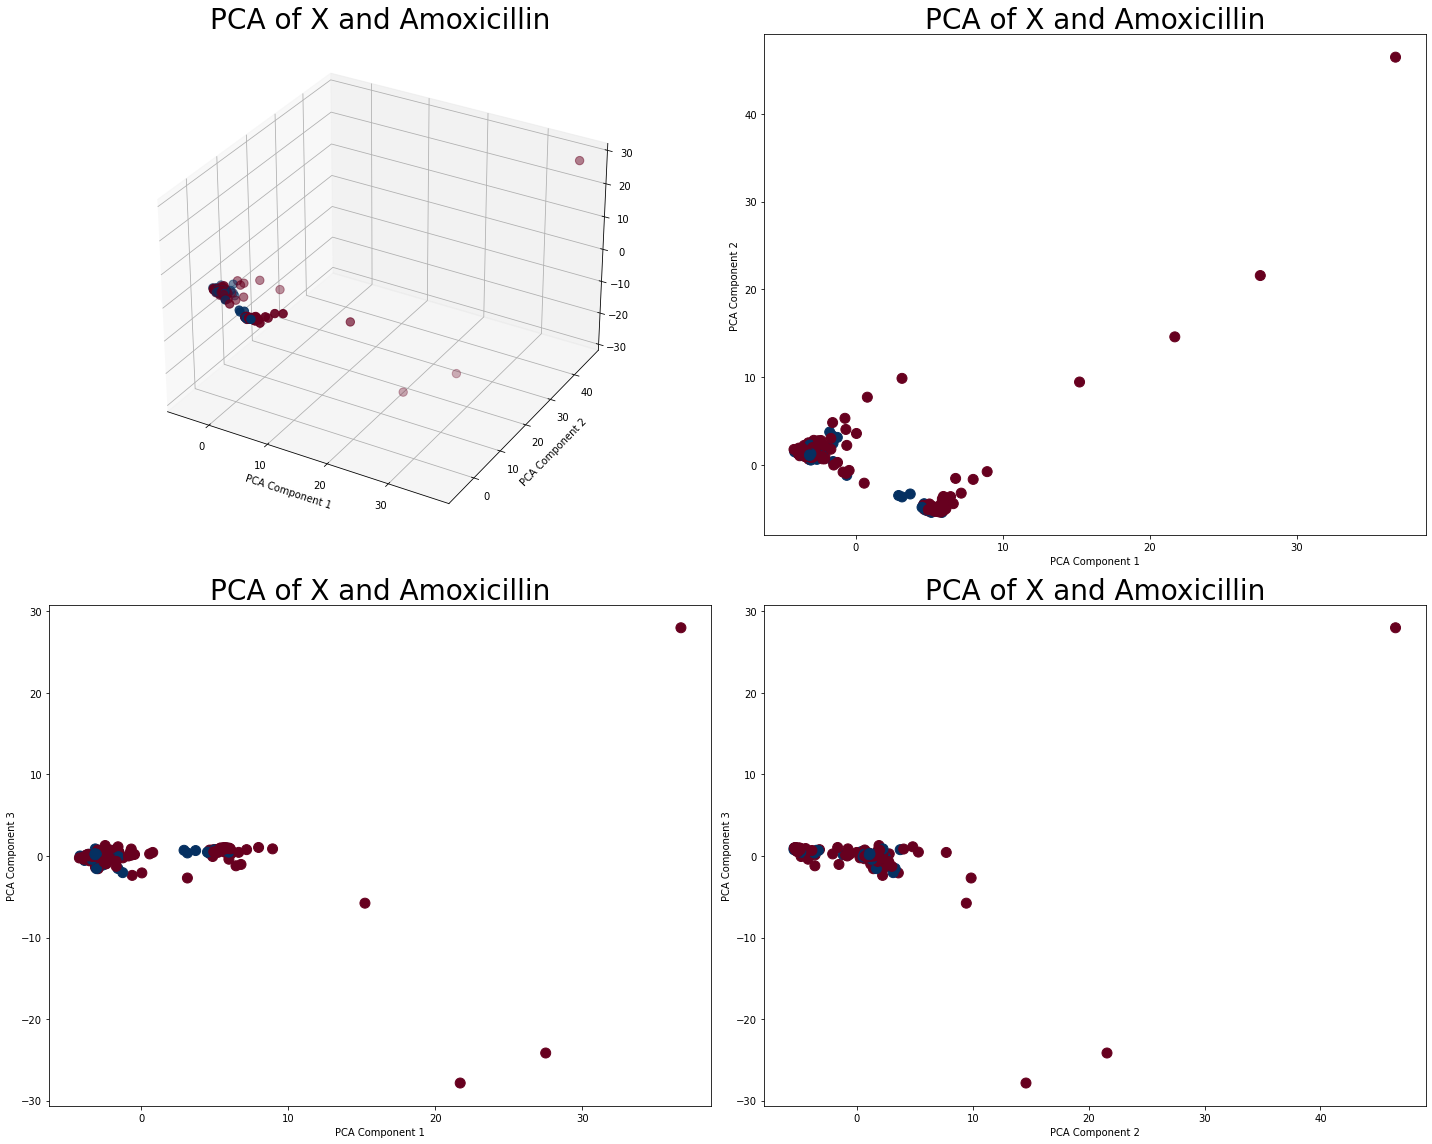

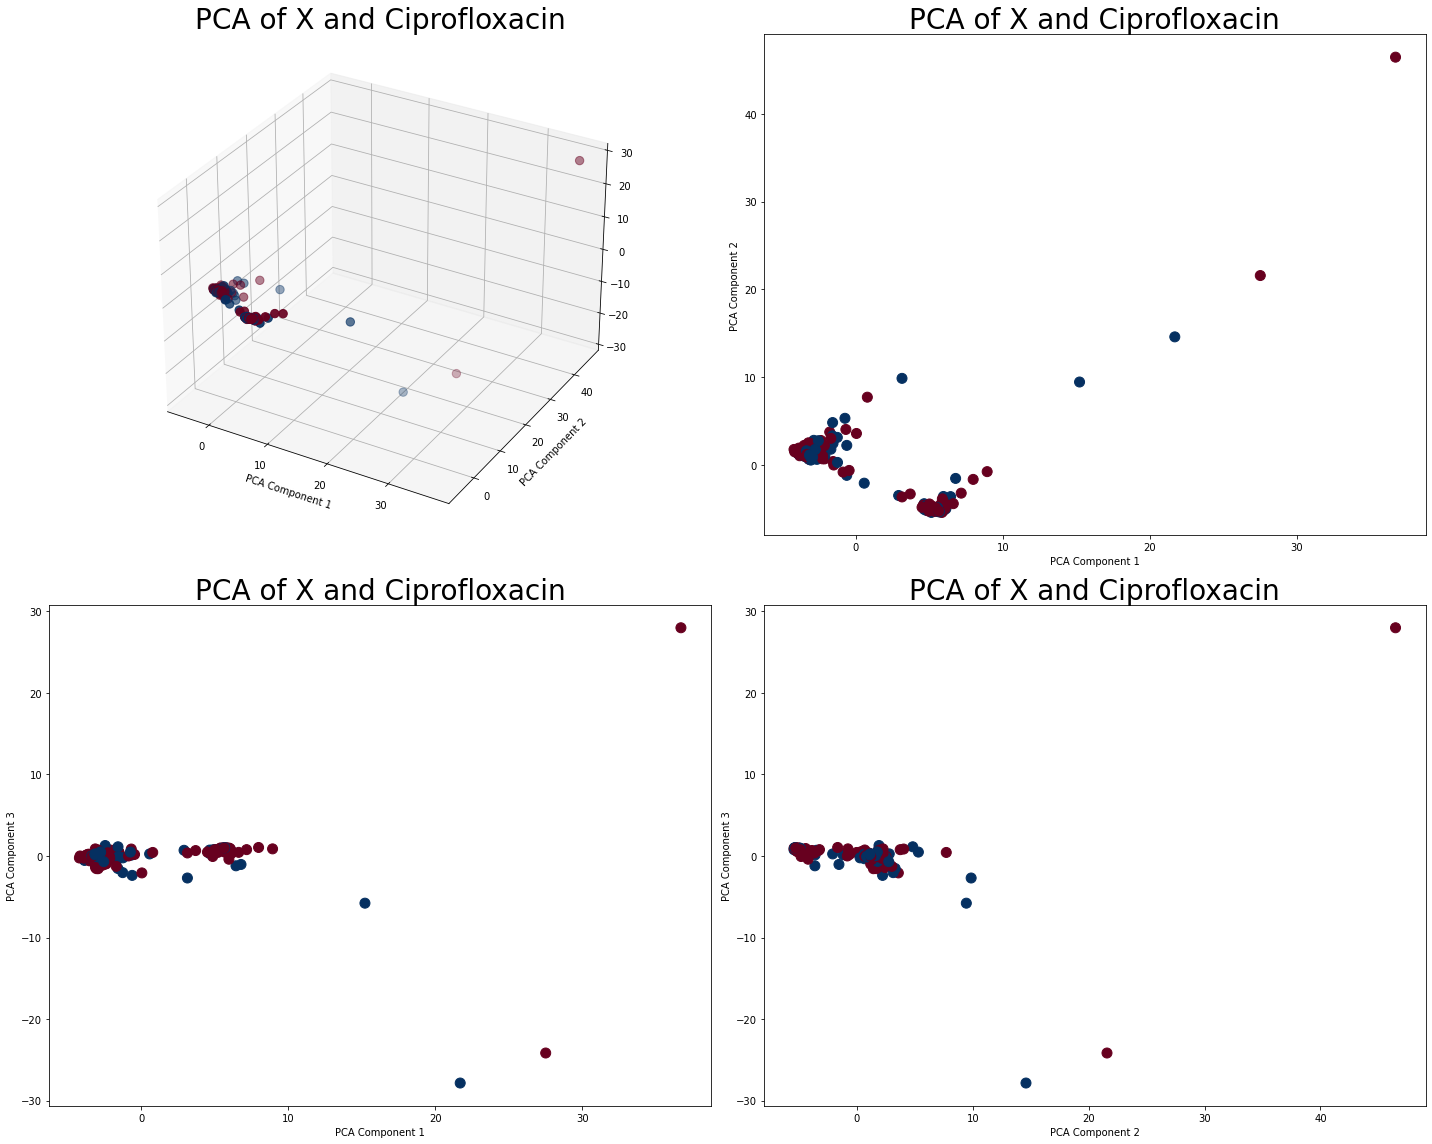

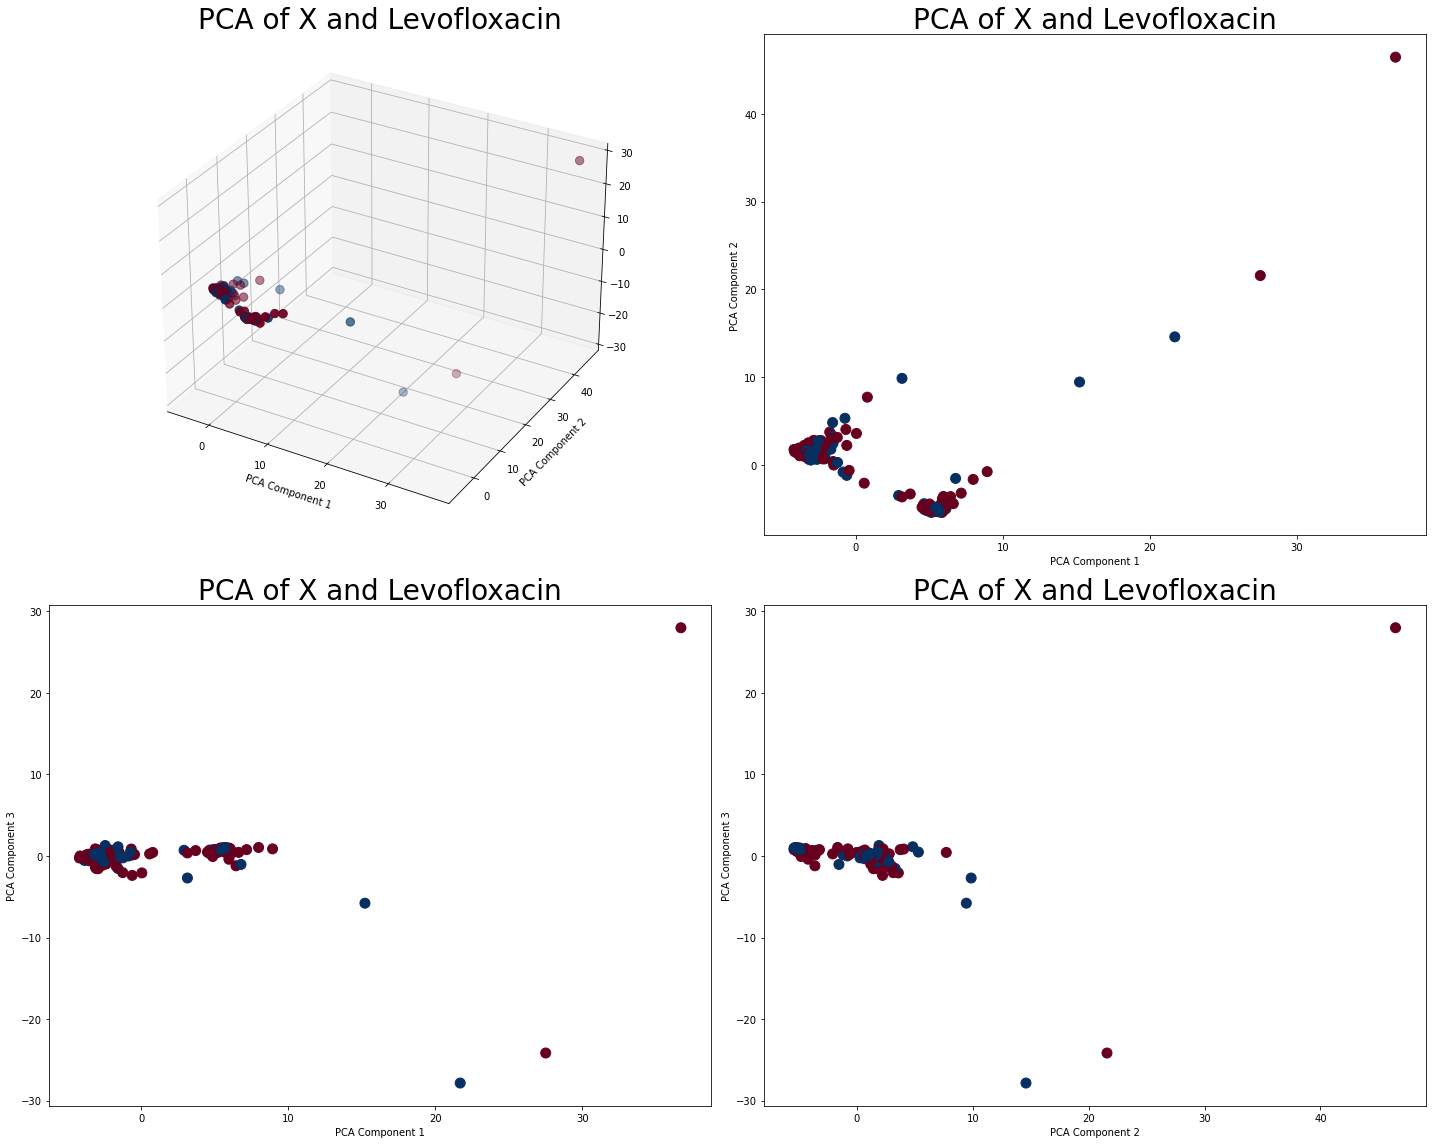

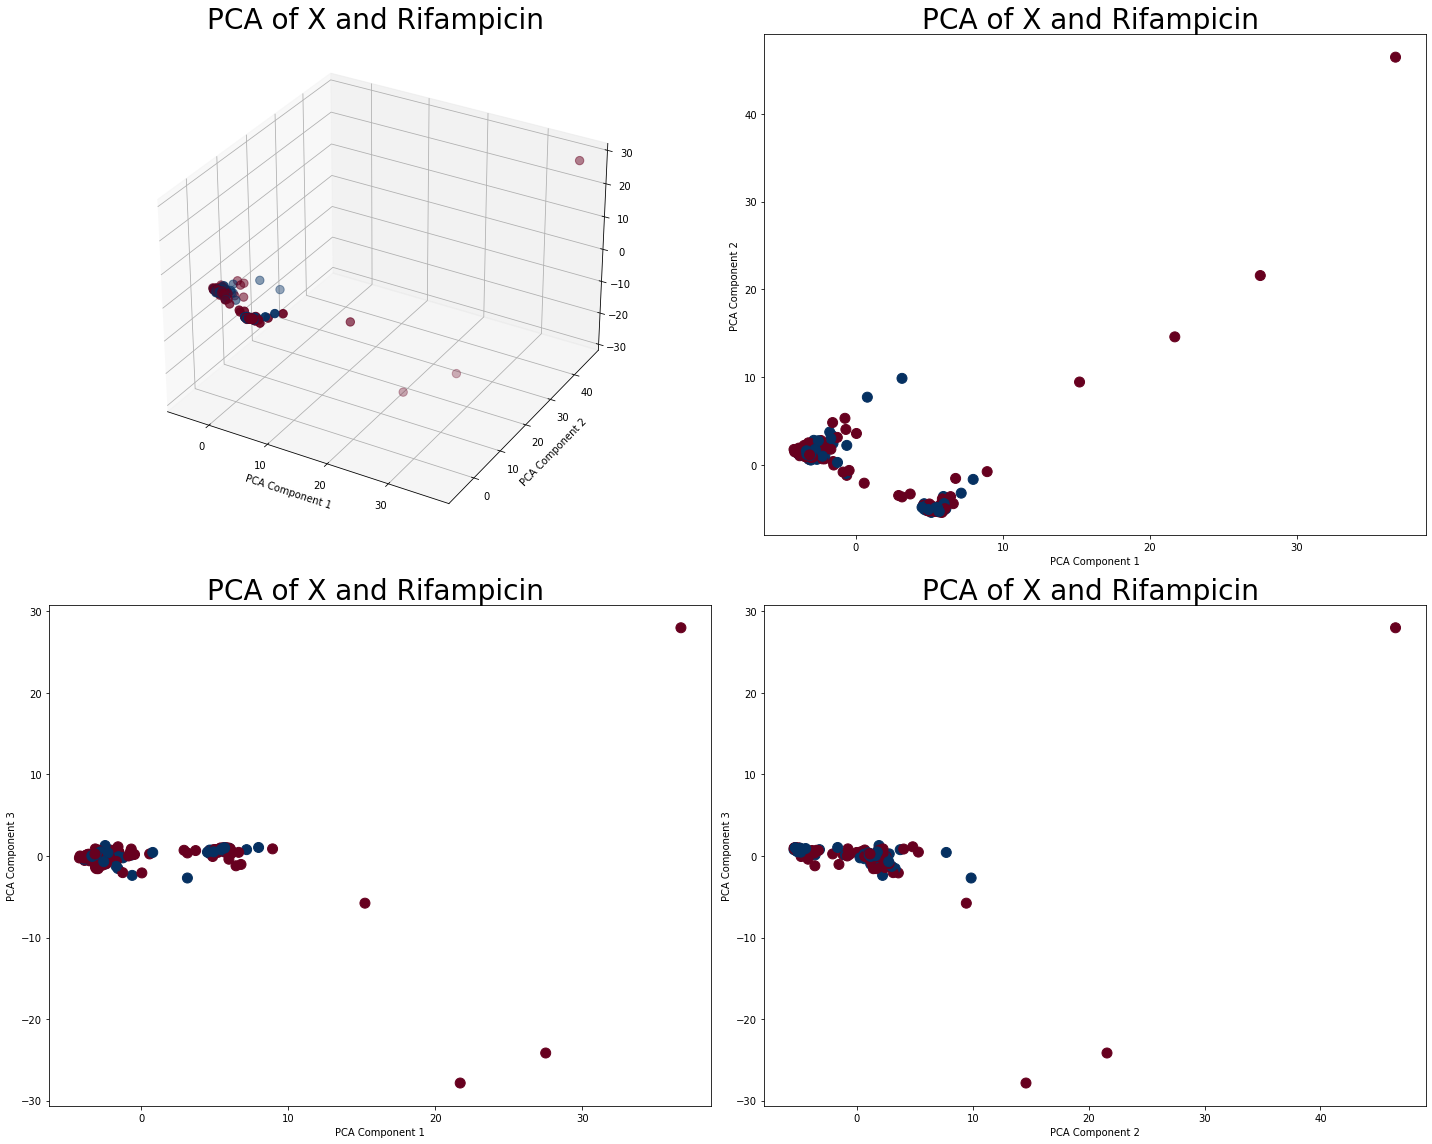

In [ ]:
for i in ['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin', 'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']:
    drug_name=i

    cmap = plt.cm.get_cmap('RdBu', 2)
    colors = cmap(np.linspace(0, 1,2))
    color_mapping = np.array([colors[int(value)] for value in y[drug_name]])

    fig = plt.figure(figsize=(20, 16))
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    ax2 = fig.add_subplot(2, 2, 2)
    ax3 = fig.add_subplot(2, 2, 3)
    ax4 = fig.add_subplot(2, 2, 4)

    ax1.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=color_mapping, s=70)
    ax1.set_xlabel('PCA Component 1')
    ax1.set_ylabel('PCA Component 2')
    ax1.set_title('PCA of X and {}'.format(i),fontsize=28)

    ax2.scatter(X_reduced[:, 0], X_reduced[:, 1],c=color_mapping, s=100)
    ax2.set_xlabel('PCA Component 1')
    ax2.set_ylabel('PCA Component 2')
    ax2.set_title('PCA of X and {}'.format(i), fontsize=28)

    ax3.scatter(X_reduced[:, 0], X_reduced[:, 2],c=color_mapping, s=100)
    ax3.set_xlabel('PCA Component 1')
    ax3.set_ylabel('PCA Component 3')
    ax3.set_title('PCA of X and {}'.format(i), fontsize=28)

    ax4.scatter(X_reduced[:, 1], X_reduced[:, 2],c=color_mapping, s=100)
    ax4.set_xlabel('PCA Component 2')
    ax4.set_ylabel('PCA Component 3')
    ax4.set_title('PCA of X and {}'.format(i), fontsize=28)

    plt.tight_layout()
    plt.show()


Best eps: 1.8
Best min_samples: 2
Best silhouette score: 0.8410254629004243
Number of clusters: 2


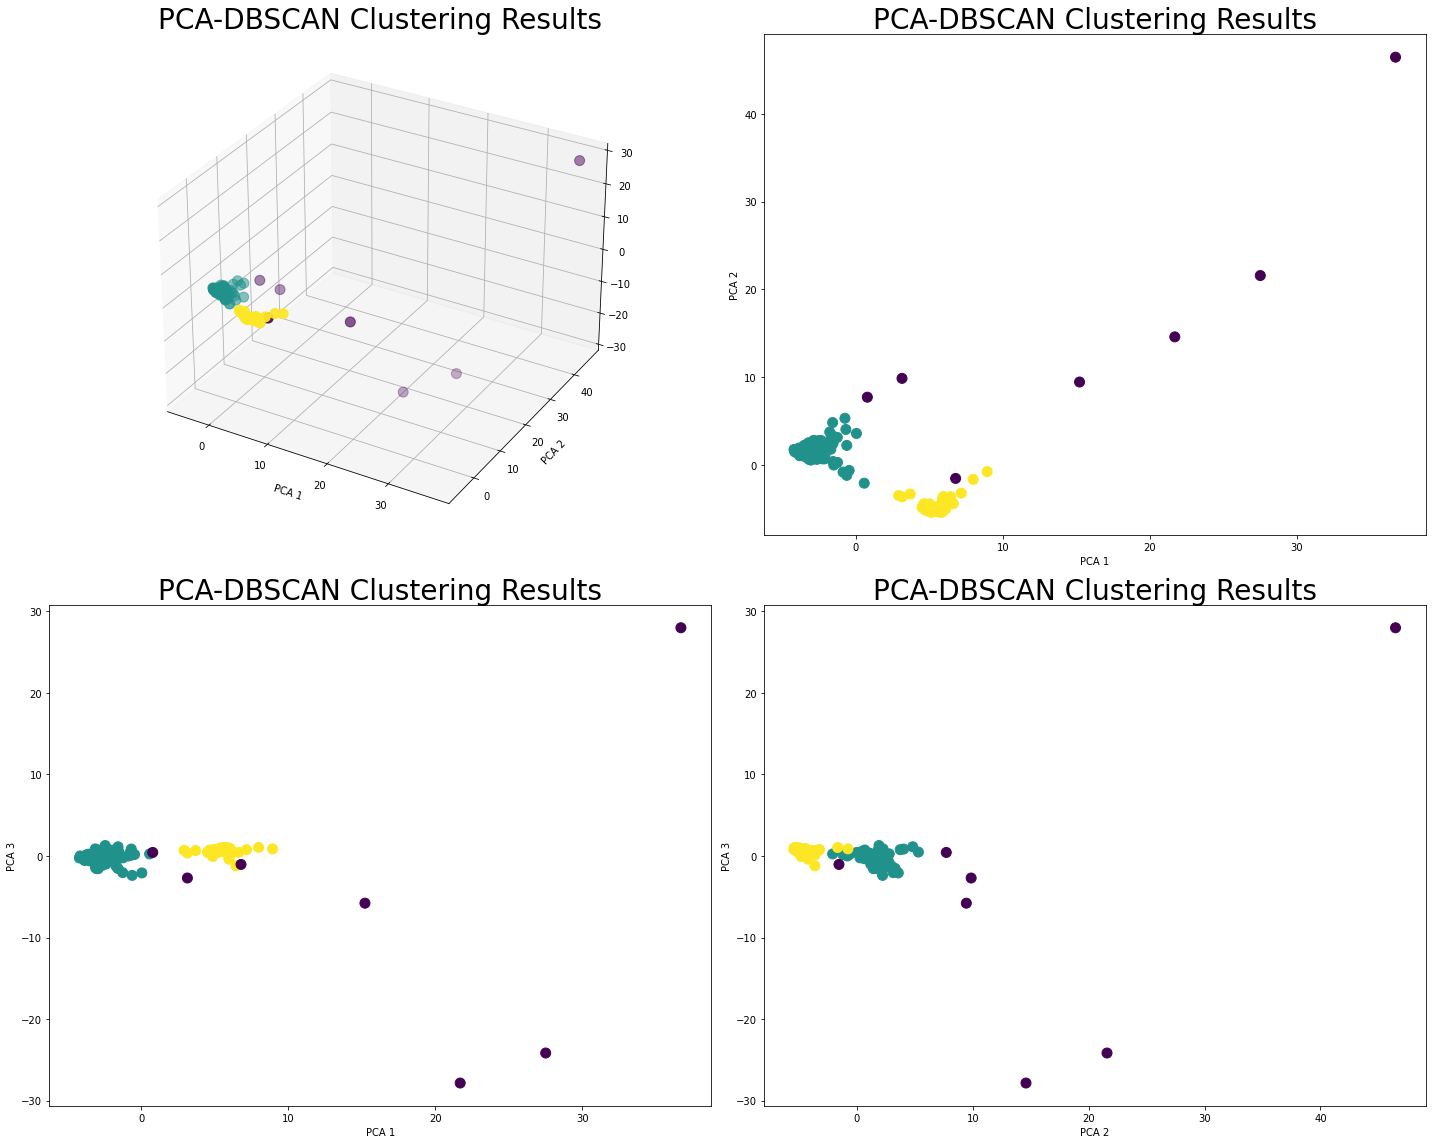

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define a range of parameter values to search over
eps_range = np.linspace(0.1, 2.0, num=20)
min_samples_range = range(2, 10)

# Perform a grid search over the parameter values
best_score = -1
best_eps = None
best_min_samples = None

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_reduced)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if n_clusters > 1:
            score = silhouette_score(X_reduced, clusters)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# Print the best parameter values and the corresponding silhouette score
print('Best eps:', best_eps)
print('Best min_samples:', best_min_samples)
print('Best silhouette score:', best_score)

# Apply DBSCAN clustering with the best parameter values
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(X_reduced)

# Print the number of clusters
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print('Number of clusters:', n_clusters)



fig = plt.figure(figsize=(20, 16))
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=clusters, cmap='viridis', s=100)
ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
ax1.set_title('PCA-DBSCAN Clustering Results', fontsize=28)


ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', s=100)
ax2.set_xlabel('PCA 1')
ax2.set_ylabel('PCA 2')
ax2.set_title('PCA-DBSCAN Clustering Results', fontsize=28)

ax3.scatter(X_reduced[:, 0], X_reduced[:, 2], c=clusters, cmap='viridis', s=100)
ax3.set_xlabel('PCA 1')
ax3.set_ylabel('PCA 3')
ax3.set_title('PCA-DBSCAN Clustering Results', fontsize=28)

ax4.scatter(X_reduced[:, 1], X_reduced[:, 2], c=clusters, cmap='viridis', s=100)
ax4.set_xlabel('PCA 2')
ax4.set_ylabel('PCA 3')
ax4.set_title('PCA-DBSCAN Clustering Results', fontsize=28)

plt.tight_layout()
plt.show()

In [ ]:
clusters = dbscan.fit_predict(X_reduced)
cluster_PCA_DBSCAN=clusters


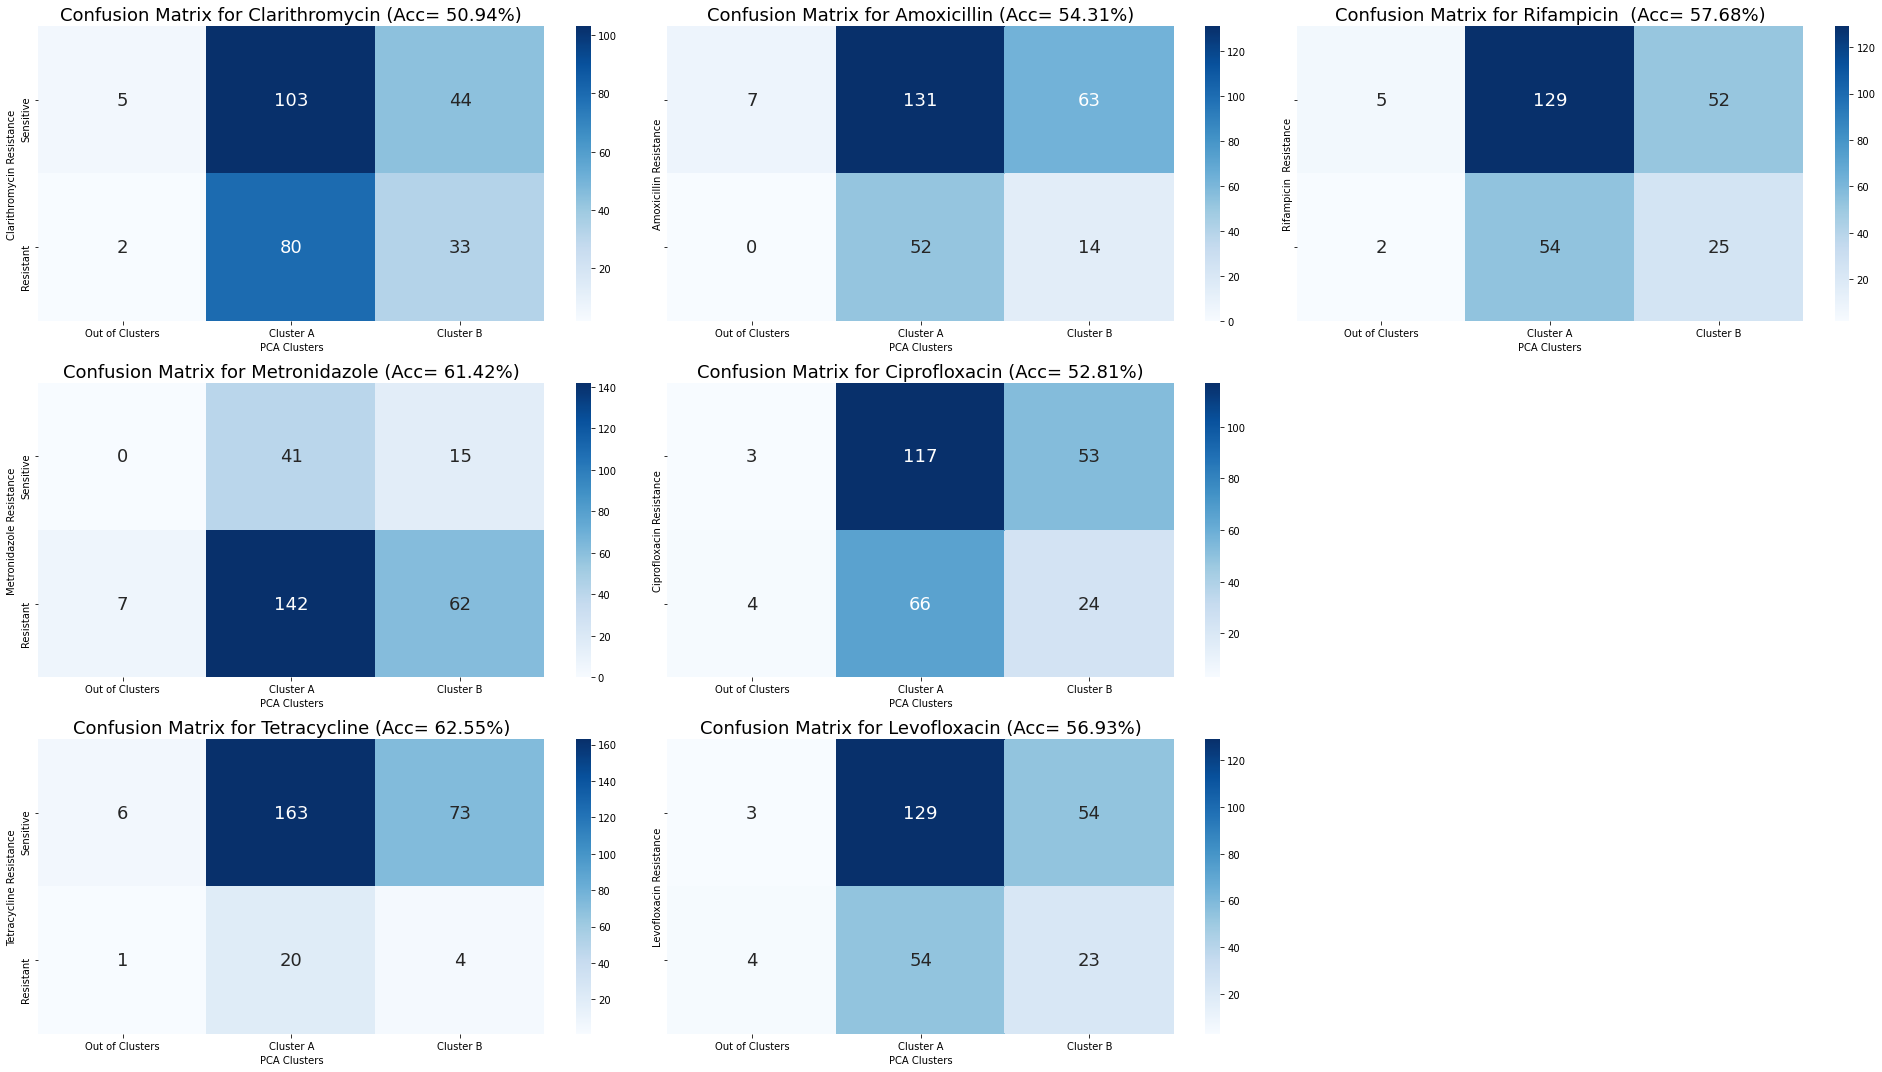

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(27, 15), sharey=True)
x_axs = 0
y_axs = 0

drug_names = ['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin', 'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']

for i, drug_name in enumerate(drug_names):

    drug_idx = y.columns.tolist().index(drug_name)
    y_true = y.iloc[:, drug_idx].astype(int).values

    cm = confusion_matrix(y_true, clusters)
    acc = accuracy_score(y_true, clusters)

    if acc<0.5:
        acc=1-acc

    cm = np.delete(cm, 0, axis=0)

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=axs[x_axs,y_axs],
                annot_kws={"fontsize":18},
                xticklabels=['Out of Clusters','Cluster A', 'Cluster B'], yticklabels=['Sensitive', 'Resistant'])
    axs[x_axs,y_axs].set_xlabel('PCA Clusters')
    axs[x_axs,y_axs].set_ylabel('{} Resistance'.format(drug_name))
    axs[x_axs,y_axs].set_title('Confusion Matrix for {} (Acc= {}%)'.format(drug_name, round(acc*100,2)),fontsize=18)

    x_axs += 1
    if x_axs > 2:
        x_axs = 0
        y_axs += 1

axs[1,2].set_visible(False)
axs[2,2].set_visible(False)

plt.tight_layout()
plt.show()



### NMF

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  factorizations" <10.1587/transfun.E92.A.708>`


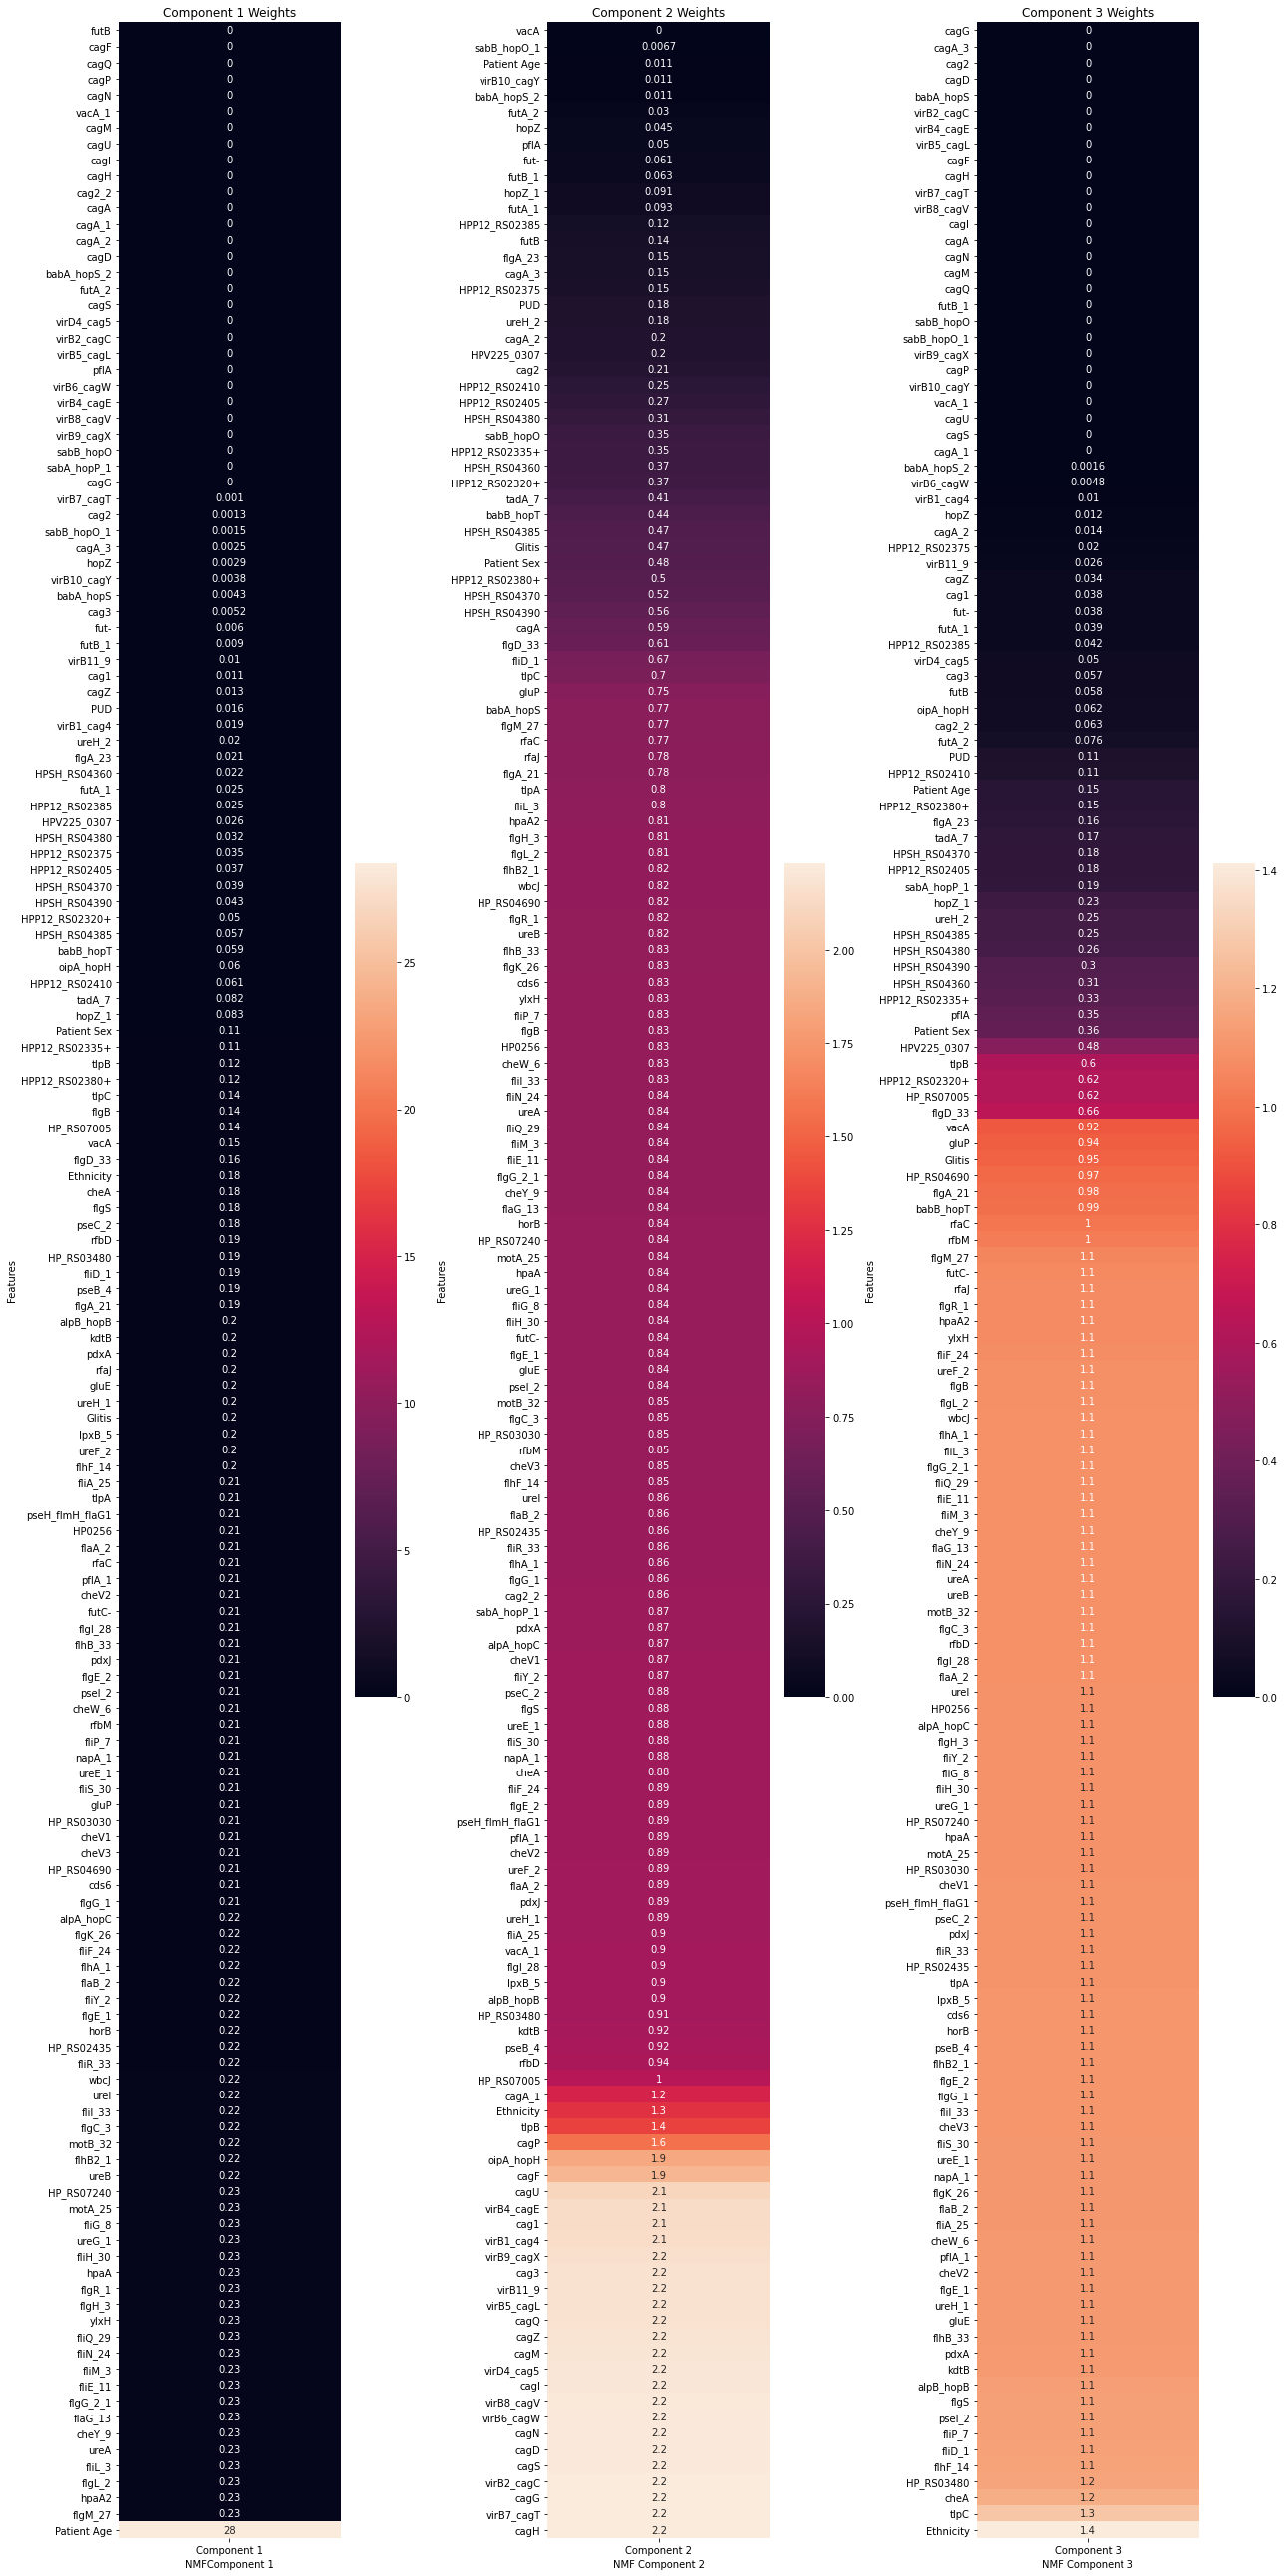

In [ ]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=3)
nmf = nmf.fit(X)
weights = nmf.components_.T
weights_df = pd.DataFrame(weights, columns=['Component 1', 'Component 2', 'Component 3'], index=X.columns[:])

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 36))

sns.heatmap(weights_df.iloc[:,0:1].sort_values(by="Component 1"), annot=True, ax=axs[0])
axs[0].set_title('Component 1 Weights')
axs[0].set_xlabel('NMFComponent 1')
axs[0].set_ylabel('Features')

sns.heatmap(weights_df.iloc[:,1:2].sort_values(by="Component 2"), annot=True, ax=axs[1])
axs[1].set_title('Component 2 Weights')
axs[1].set_xlabel('NMF Component 2')
axs[1].set_ylabel('Features')

sns.heatmap(weights_df.iloc[:,2:3].sort_values(by="Component 3"), annot=True, ax=axs[2])
axs[2].set_title('Component 3 Weights')
axs[2].set_xlabel('NMF Component 3')
axs[2].set_ylabel('Features')

plt.tight_layout()
plt.show()

In [ ]:
nmf = NMF(n_components=3)
nmf = nmf.fit_transform(X)
X_reduced = nmf[:, :3]

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  factorizations" <10.1587/transfun.E92.A.708>`


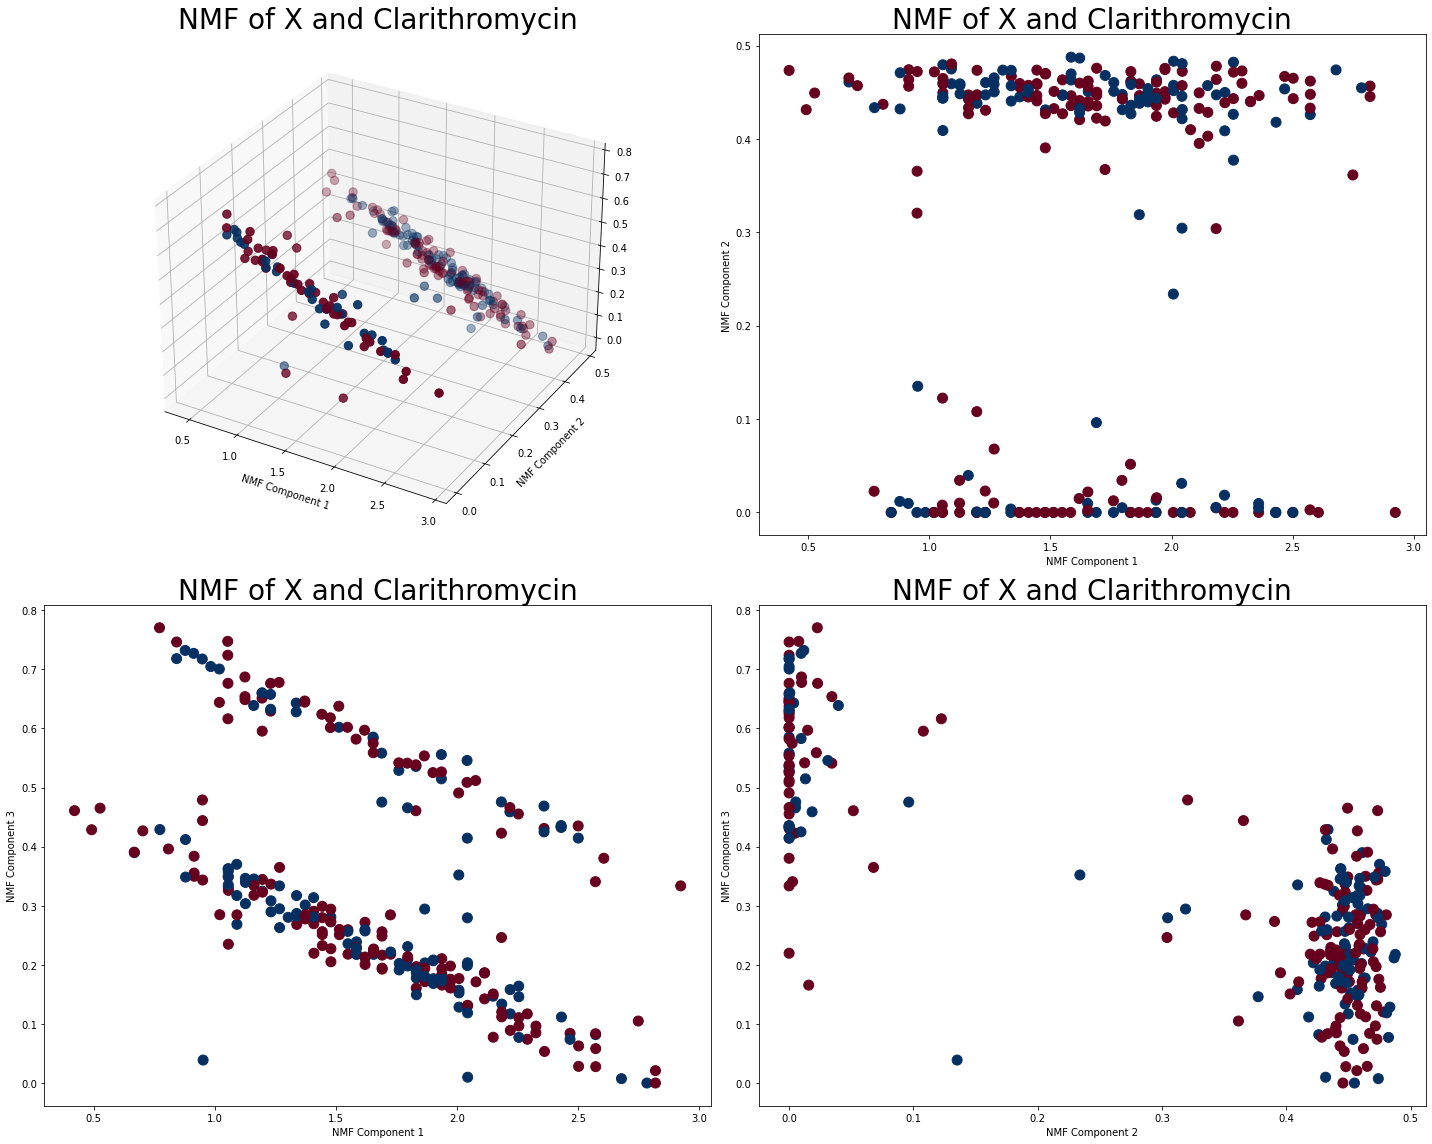

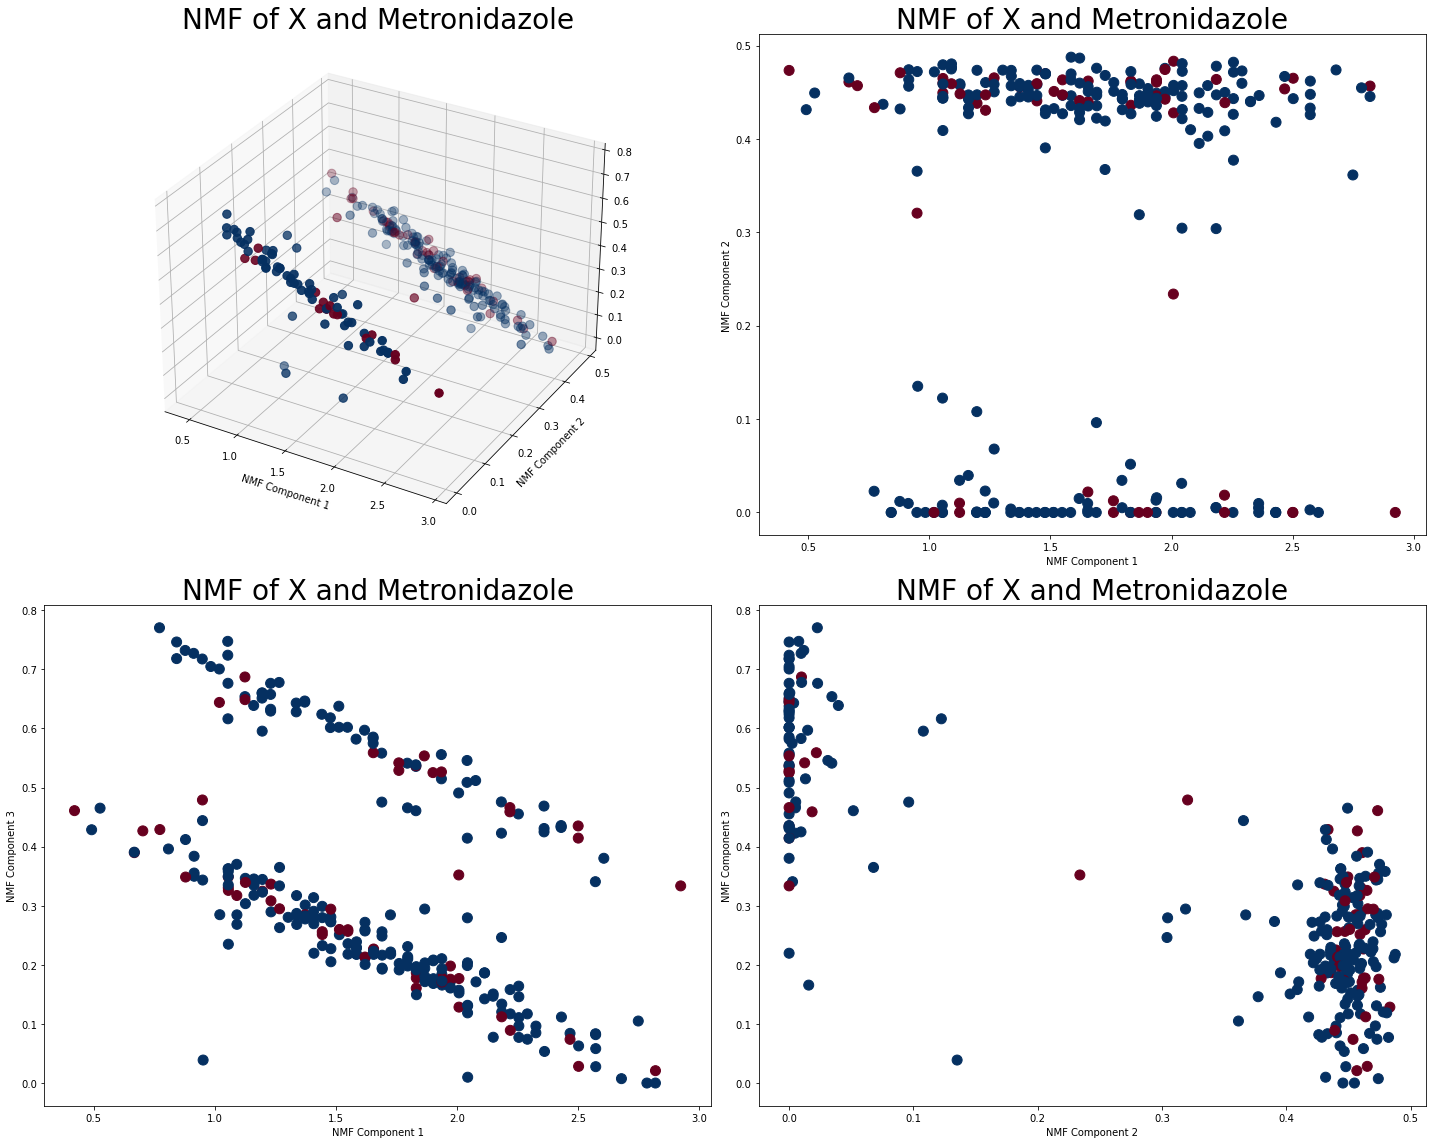

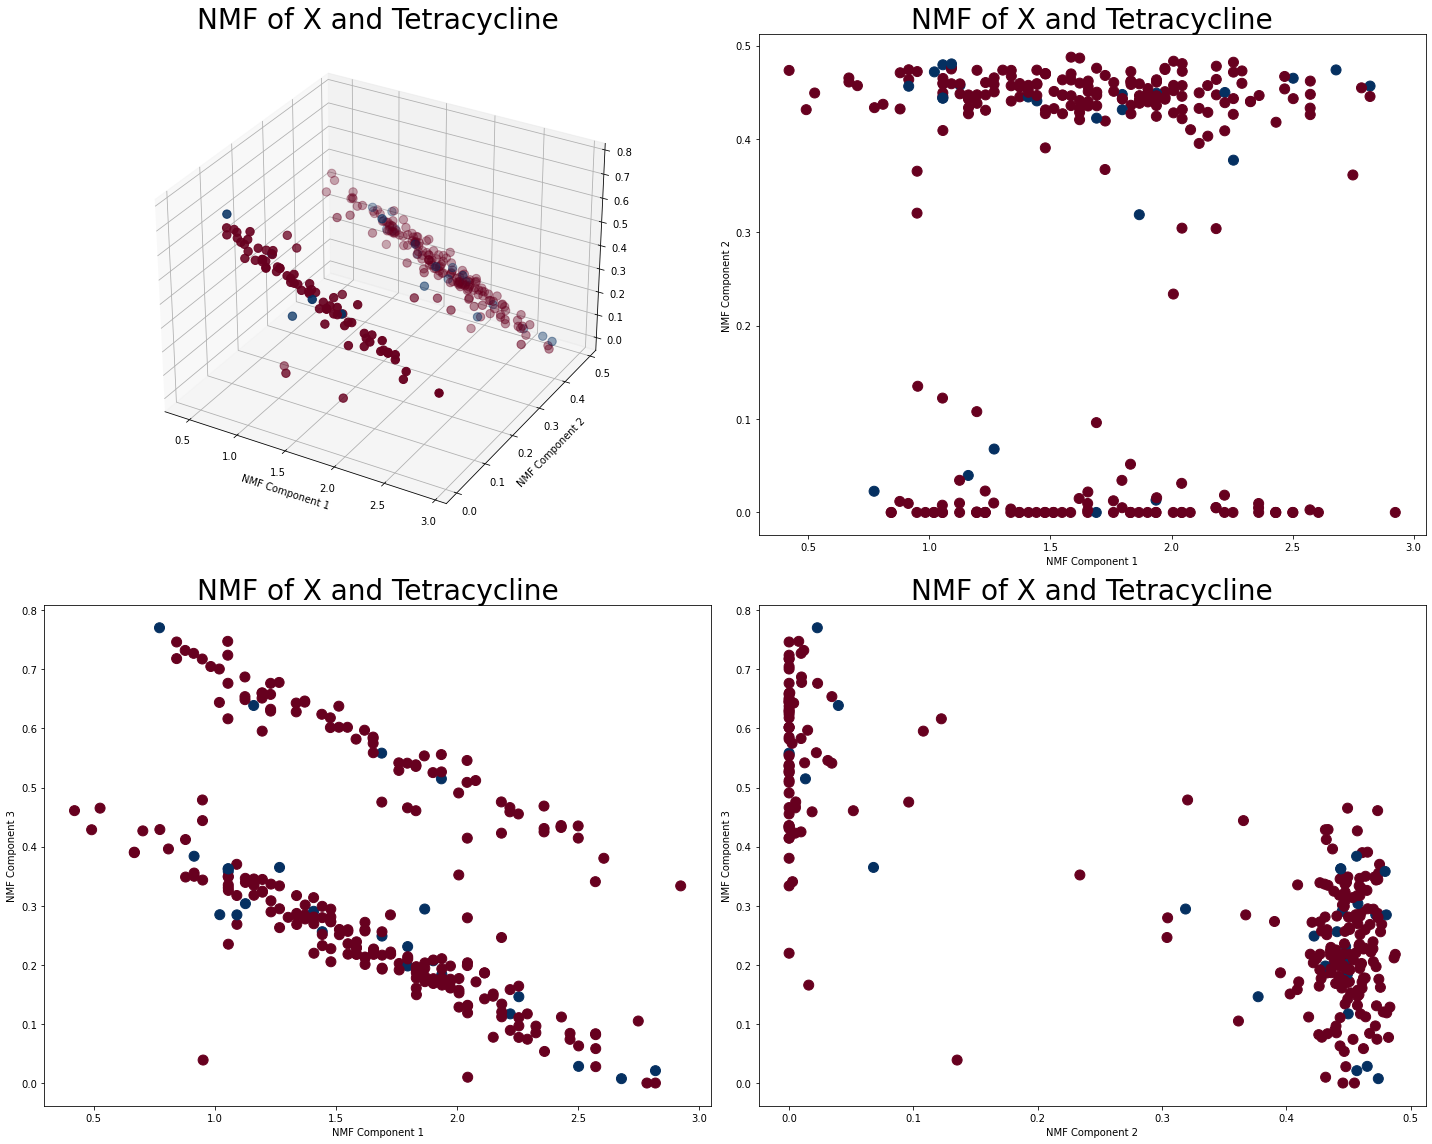

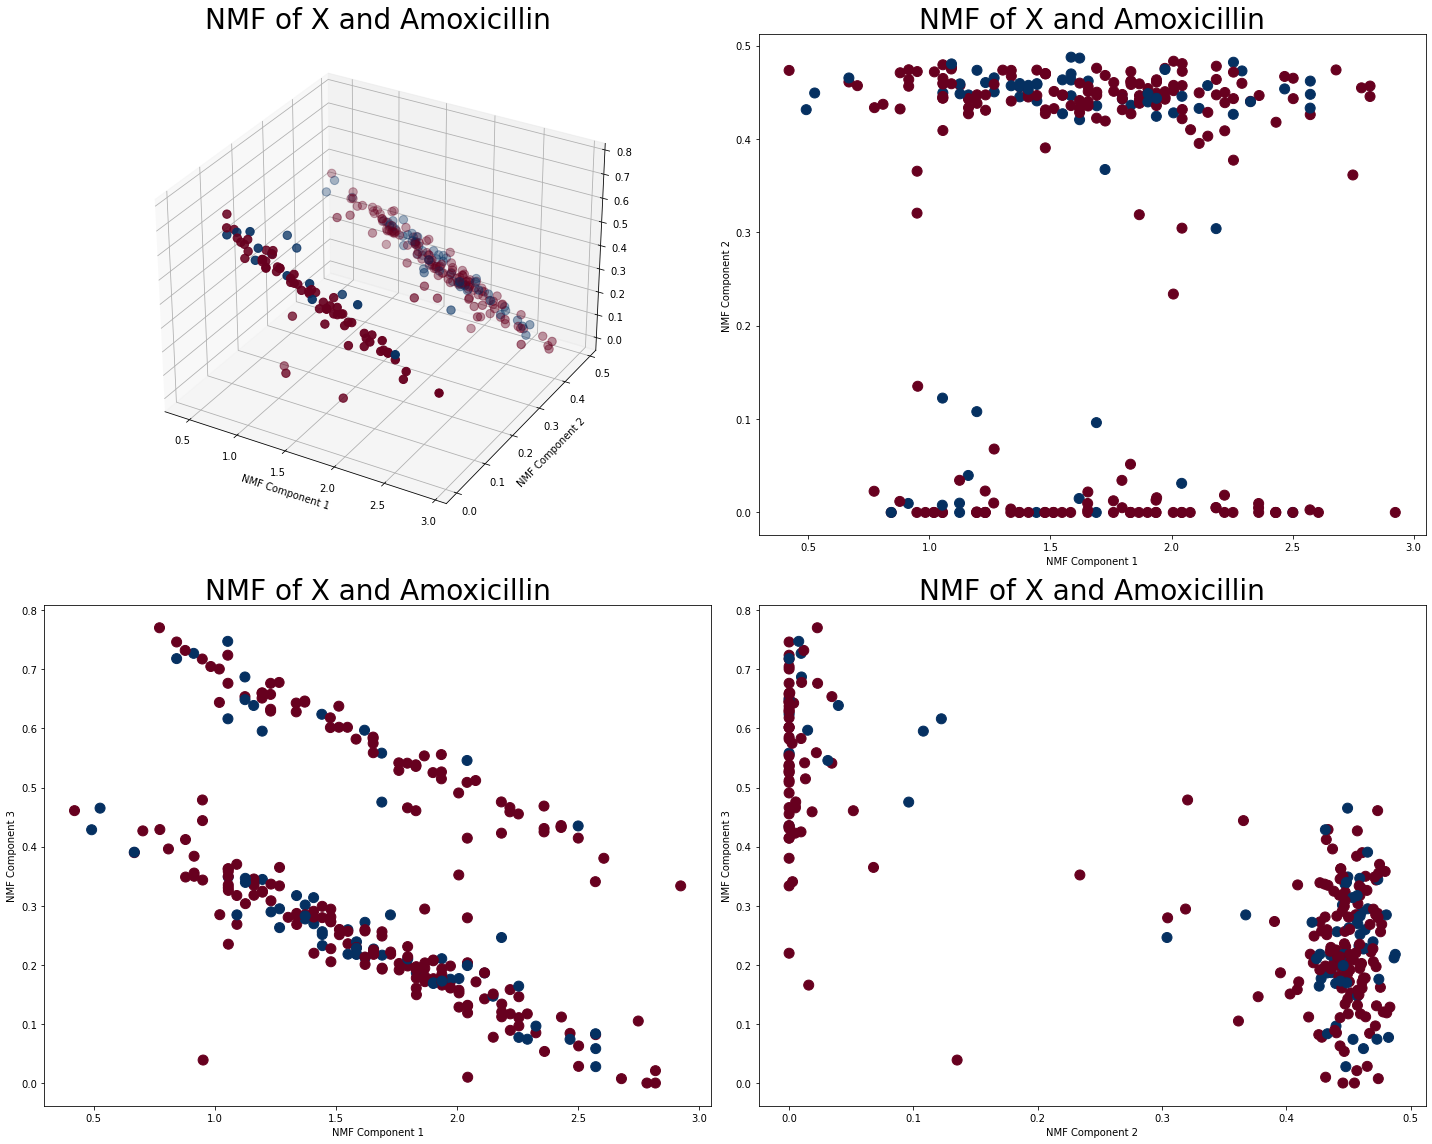

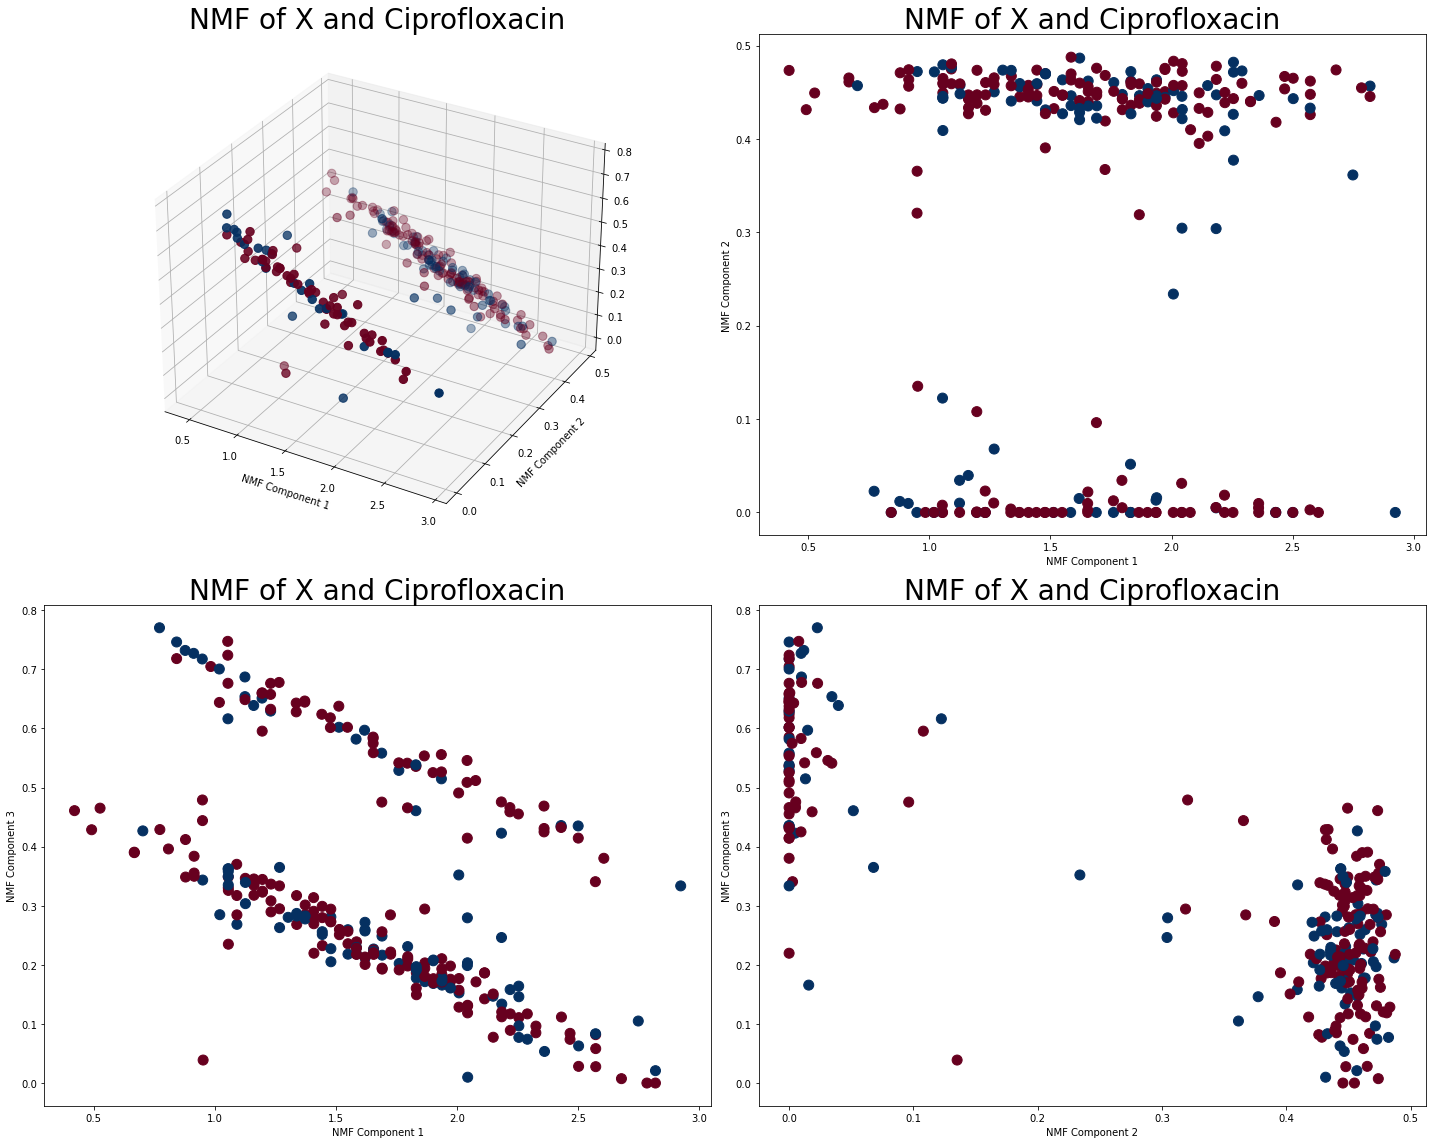

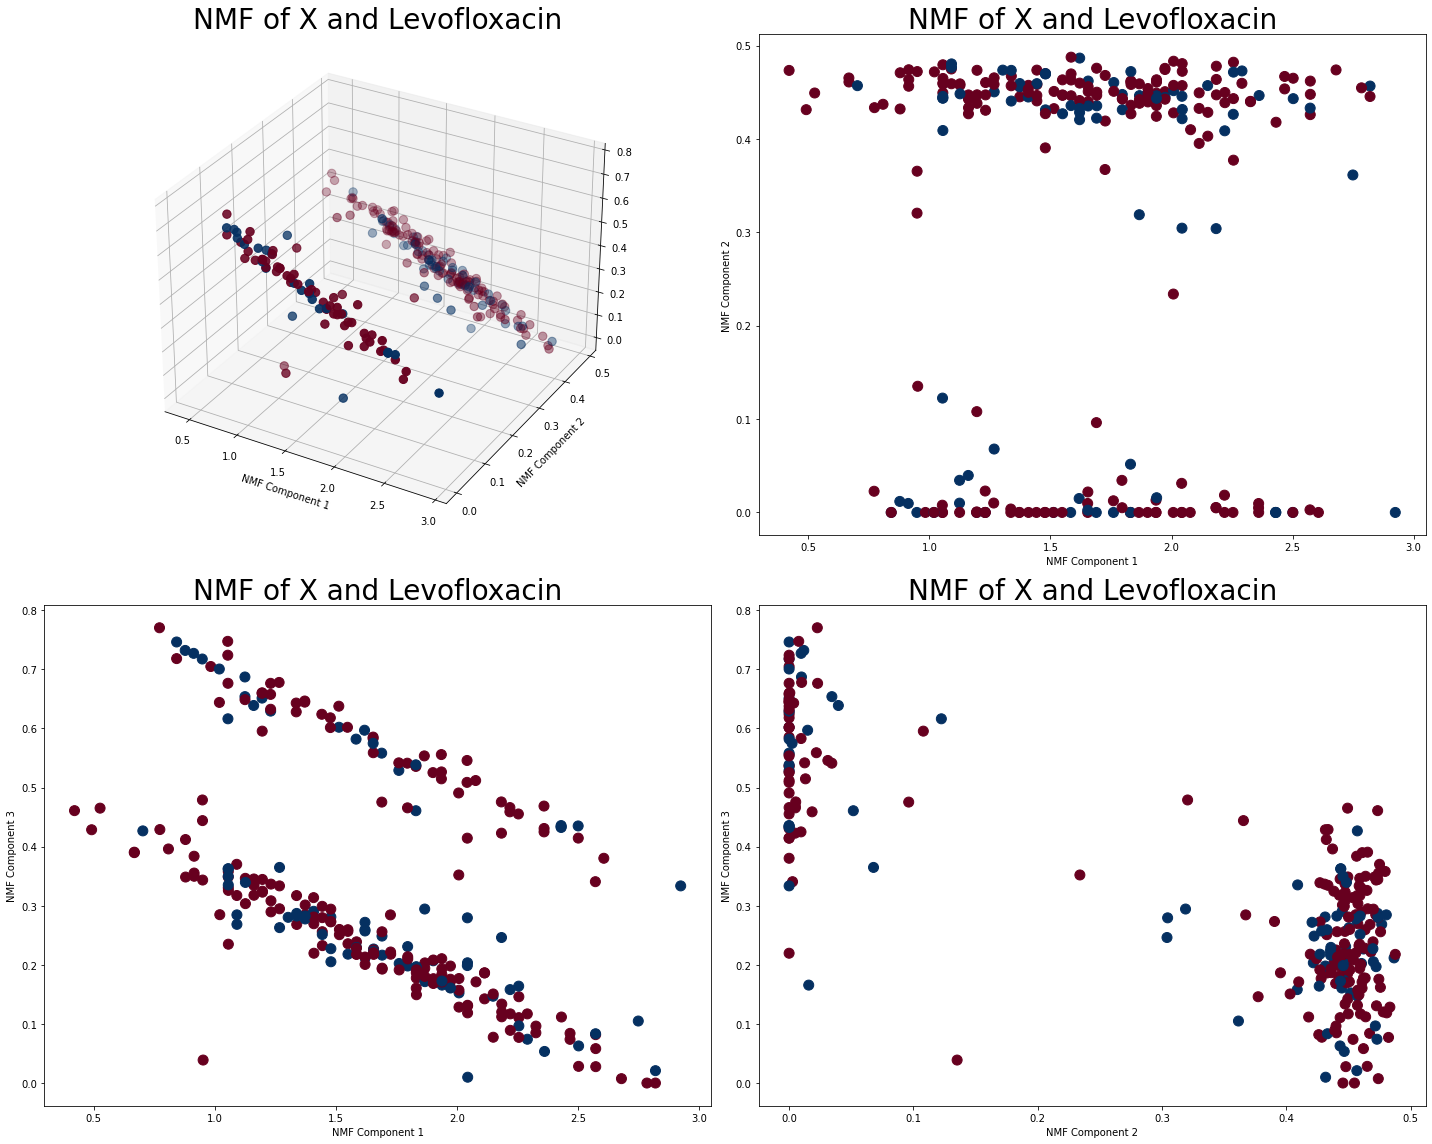

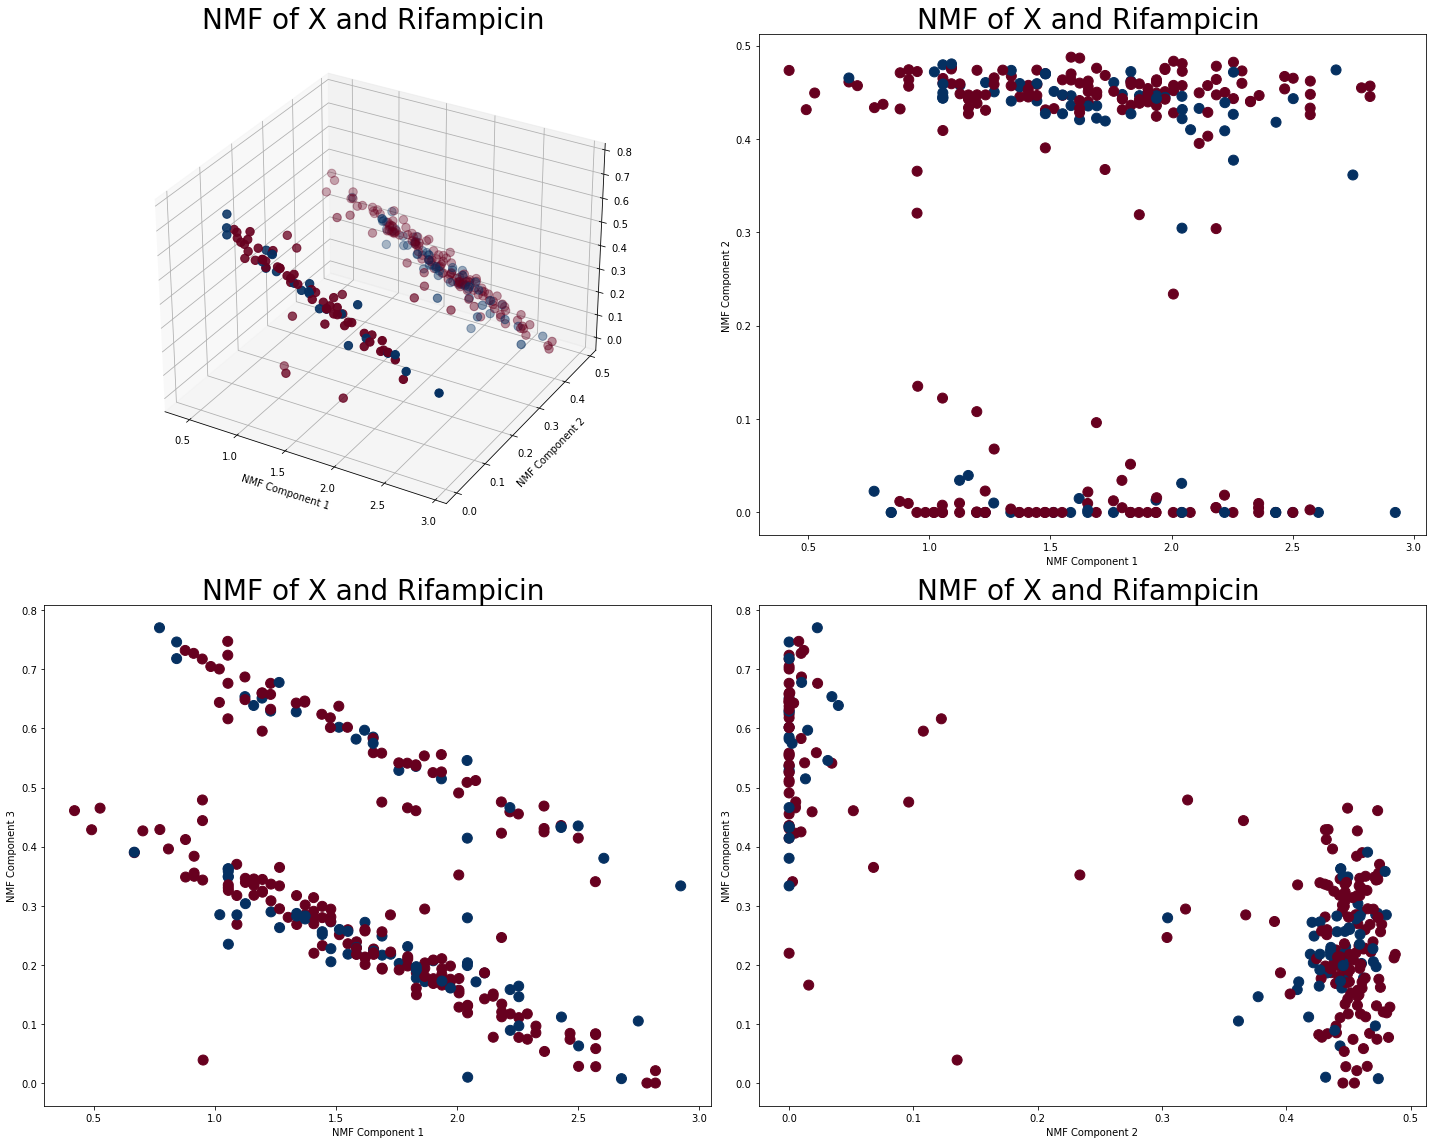

In [ ]:
for i in ['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin', 'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']:
    drug_name=i

    cmap = plt.cm.get_cmap('RdBu', 2)
    colors = cmap(np.linspace(0, 1,2))
    color_mapping = np.array([colors[int(value)] for value in y[drug_name]])

    fig = plt.figure(figsize=(20, 16))
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    ax2 = fig.add_subplot(2, 2, 2)
    ax3 = fig.add_subplot(2, 2, 3)
    ax4 = fig.add_subplot(2, 2, 4)

    ax1.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=color_mapping, s=70)
    ax1.set_xlabel('NMF Component 1')
    ax1.set_ylabel('NMF Component 2')
    ax1.set_title('NMF of X and {}'.format(i),fontsize=28)

    ax2.scatter(X_reduced[:, 0], X_reduced[:, 1],c=color_mapping, s=100)
    ax2.set_xlabel('NMF Component 1')
    ax2.set_ylabel('NMF Component 2')
    ax2.set_title('NMF of X and {}'.format(i), fontsize=28)

    ax3.scatter(X_reduced[:, 0], X_reduced[:, 2],c=color_mapping, s=100)
    ax3.set_xlabel('NMF Component 1')
    ax3.set_ylabel('NMF Component 3')
    ax3.set_title('NMF of X and {}'.format(i), fontsize=28)

    ax4.scatter(X_reduced[:, 1], X_reduced[:, 2],c=color_mapping, s=100)
    ax4.set_xlabel('NMF Component 2')
    ax4.set_ylabel('NMF Component 3')
    ax4.set_title('NMF of X and {}'.format(i), fontsize=28)

    plt.tight_layout()
    plt.show()


Best eps: 0.2
Best min_samples: 7
Best silhouette score: 0.29870023618320635
Number of clusters: 2


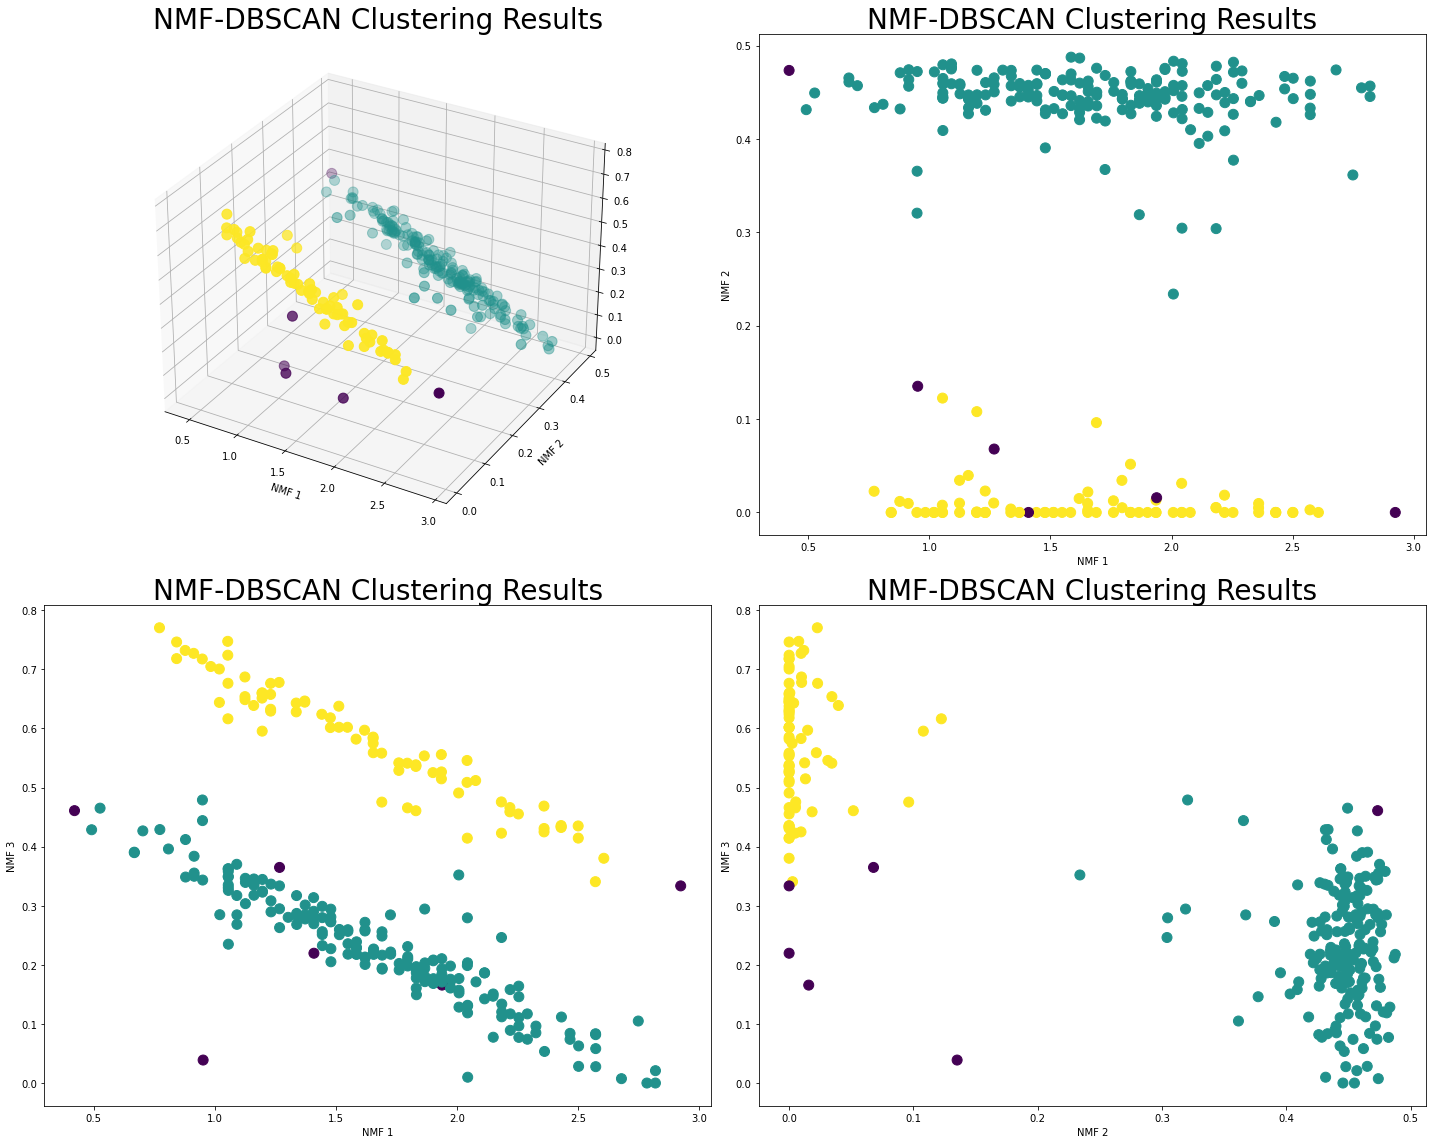

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define a range of parameter values to search over
eps_range = np.linspace(0.1, 2.0, num=20)
min_samples_range = range(2, 10)

# Perform a grid search over the parameter values
best_score = -1
best_eps = None
best_min_samples = None

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_reduced)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if n_clusters > 1:
            score = silhouette_score(X_reduced, clusters)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# Print the best parameter values and the corresponding silhouette score
print('Best eps:', best_eps)
print('Best min_samples:', best_min_samples)
print('Best silhouette score:', best_score)

# Apply DBSCAN clustering with the best parameter values
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(X_reduced)

# Print the number of clusters
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print('Number of clusters:', n_clusters)



fig = plt.figure(figsize=(20, 16))
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=clusters, cmap='viridis', s=100)
ax1.set_xlabel('NMF 1')
ax1.set_ylabel('NMF 2')
ax1.set_title('NMF-DBSCAN Clustering Results', fontsize=28)


ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', s=100)
ax2.set_xlabel('NMF 1')
ax2.set_ylabel('NMF 2')
ax2.set_title('NMF-DBSCAN Clustering Results', fontsize=28)

ax3.scatter(X_reduced[:, 0], X_reduced[:, 2], c=clusters, cmap='viridis', s=100)
ax3.set_xlabel('NMF 1')
ax3.set_ylabel('NMF 3')
ax3.set_title('NMF-DBSCAN Clustering Results', fontsize=28)

ax4.scatter(X_reduced[:, 1], X_reduced[:, 2], c=clusters, cmap='viridis', s=100)
ax4.set_xlabel('NMF 2')
ax4.set_ylabel('NMF 3')
ax4.set_title('NMF-DBSCAN Clustering Results', fontsize=28)

plt.tight_layout()
plt.show()

In [ ]:
clusters = dbscan.fit_predict(X_reduced)
cluster_NMF_DBSCAN=clusters


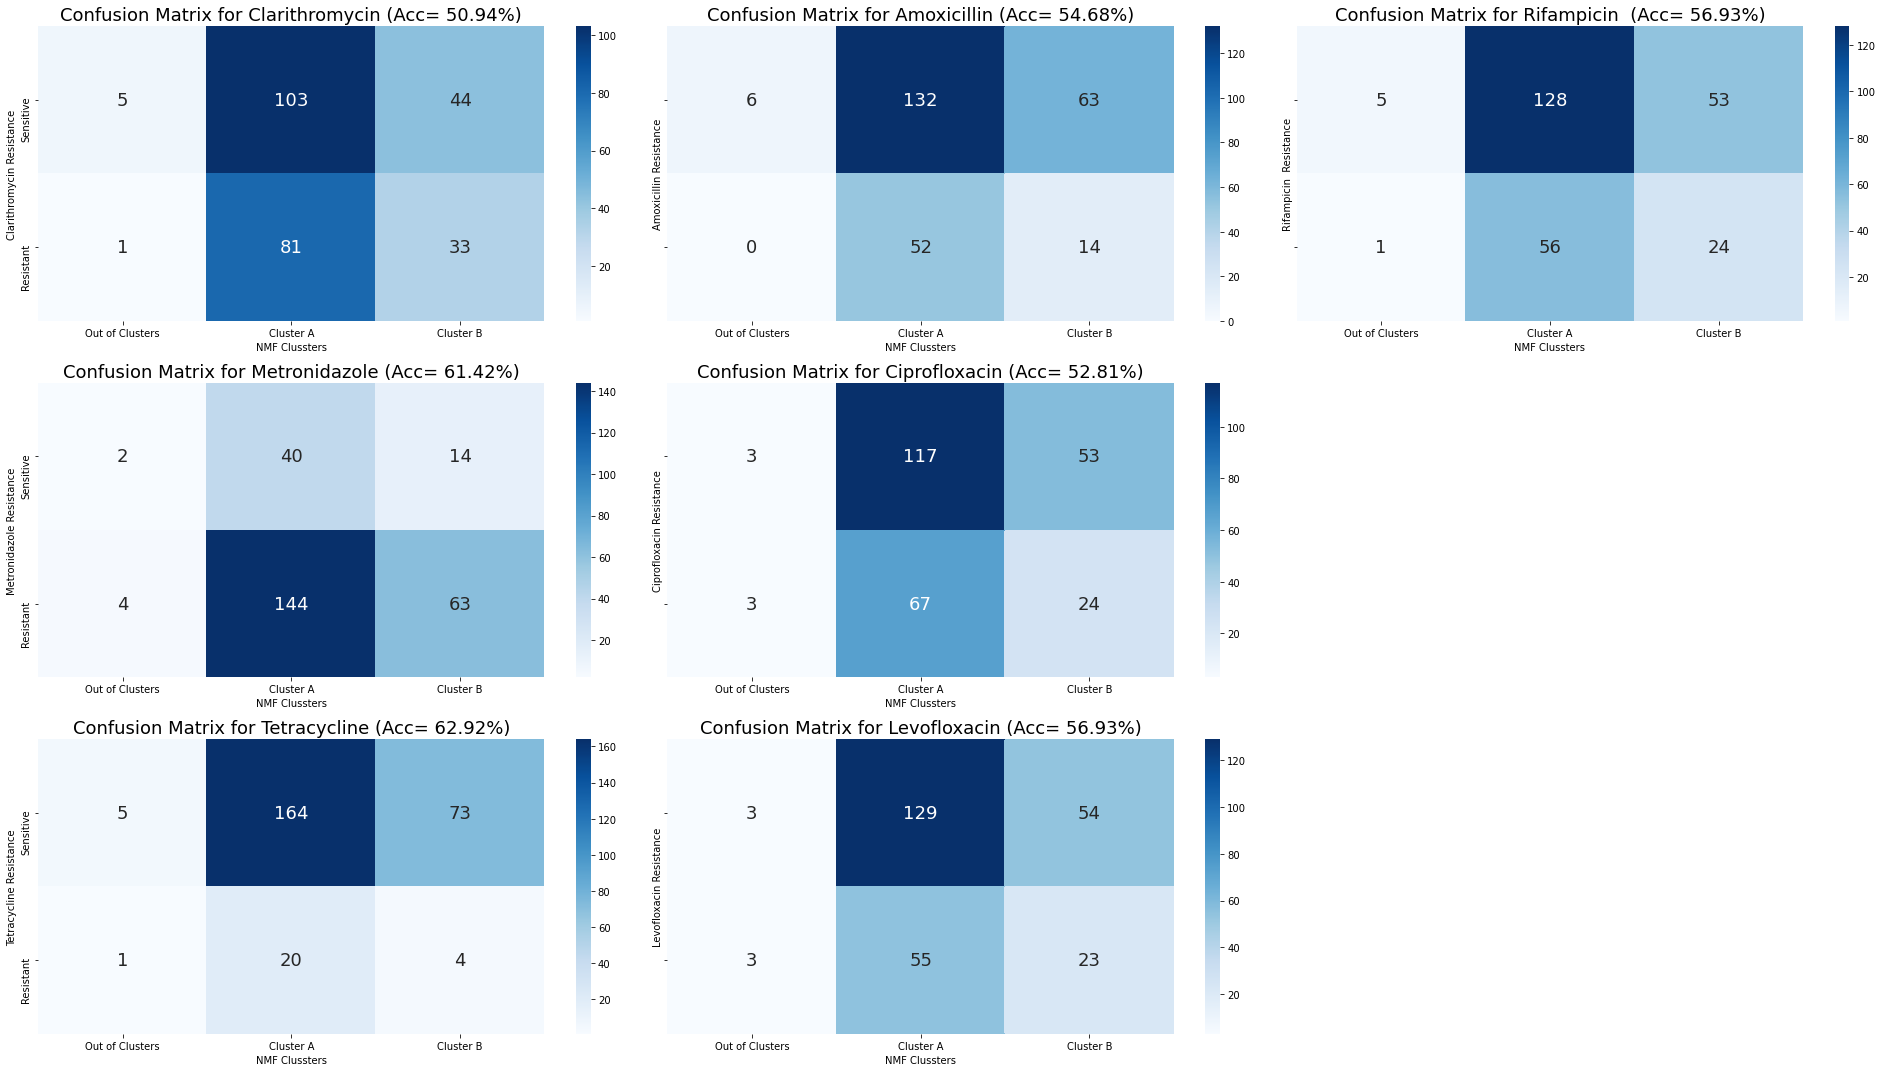

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(27, 15), sharey=True)
x_axs = 0
y_axs = 0

drug_names = ['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin', 'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']

for i, drug_name in enumerate(drug_names):

    drug_idx = y.columns.tolist().index(drug_name)
    y_true = y.iloc[:, drug_idx].astype(int).values

    cm = confusion_matrix(y_true, clusters)
    acc = accuracy_score(y_true, clusters)

    if acc<0.5:
        acc=1-acc

    cm = np.delete(cm, 0, axis=0)

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=axs[x_axs,y_axs],
                annot_kws={"fontsize":18},
                xticklabels=['Out of Clusters','Cluster A', 'Cluster B'], yticklabels=['Sensitive', 'Resistant'])
    axs[x_axs,y_axs].set_xlabel('NMF Clussters')
    axs[x_axs,y_axs].set_ylabel('{} Resistance'.format(drug_name))
    axs[x_axs,y_axs].set_title('Confusion Matrix for {} (Acc= {}%)'.format(drug_name, round(acc*100,2)), fontsize=18)

    x_axs += 1
    if x_axs > 2:
        x_axs = 0
        y_axs += 1

axs[1,2].set_visible(False)
axs[2,2].set_visible(False)

plt.tight_layout()
plt.show()



### best number of component NMF and PCA

In [ ]:
X=df.drop(columns=['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin',
                   'Ciprofloxacin', 'Levofloxacin', 'Rifampicin '])

The optimal number of components is 30


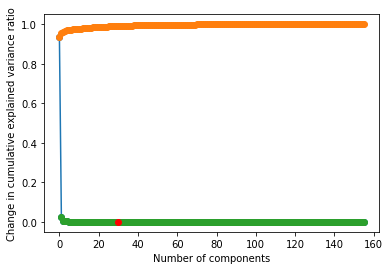

In [ ]:
pca = PCA()
pca.fit(X)

# Plot the explained variance ratio as a function of the number of components
plt.plot(pca.explained_variance_ratio_, '-o')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')

# Plot the cumulative explained variance ratio as a function of the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')

# Plot the elbow
diff = np.diff(np.cumsum(pca.explained_variance_ratio_))
plt.plot(range(1, len(diff)+1), diff, '-o')
plt.xlabel('Number of components')
plt.ylabel('Change in cumulative explained variance ratio')

# Find the elbow point using the first derivative of the cumulative explained variance ratio
elbow_index = np.where(diff < np.mean(diff))[0][0]
optimal_n_components = elbow_index + 1
print(f"The optimal number of components is {optimal_n_components}")

# Plot the elbow point
plt.plot(optimal_n_components, diff[optimal_n_components-1], 'ro')

plt.show()

In [ ]:
#### YOU left coding here. Start from here on. 

pca = PCA(n_components=3)
pca = pca.fit_transform(X)
X_reduced = pca[:, :3]


eps_range = np.linspace(0.1, 2.0, num=20)
min_samples_range = range(2, 10)

# Perform a grid search over the parameter values
best_score = -1
best_eps = None
best_min_samples = None

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_reduced)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if n_clusters > 1:
            score = silhouette_score(X_reduced, clusters)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# Print the best parameter values and the corresponding silhouette score
print('Best eps:', best_eps)
print('Best min_samples:', best_min_samples)
print('Best silhouette score:', best_score)

# Apply DBSCAN clustering with the best parameter values
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(X_reduced)

# Print the number of clusters
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print('Number of clusters:', n_clusters)

from sklearn.metrics import confusion_matrix, accuracy_score

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(27, 15), sharey=True)
x_axs = 0
y_axs = 0

drug_names = ['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin', 'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']

for i, drug_name in enumerate(drug_names):

    drug_idx = y.columns.tolist().index(drug_name)
    y_true = y.iloc[:, drug_idx].astype(int).values

    cm = confusion_matrix(y_true, clusters)
    acc = accuracy_score(y_true, clusters)

    if acc<0.5:
        acc=1-acc

    cm = np.delete(cm, 0, axis=0)

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=axs[x_axs,y_axs],
                annot_kws={"fontsize":18},
                xticklabels=['Out of Clusters','Cluster A', 'Cluster B'], yticklabels=['Sensitive', 'Resistant'])
    axs[x_axs,y_axs].set_xlabel('PCA Clusters')
    axs[x_axs,y_axs].set_ylabel('{} Resistance'.format(drug_name))
    axs[x_axs,y_axs].set_title('Confusion Matrix for {} (Acc= {}%)'.format(drug_name, round(acc*100,2)),fontsize=18)

    x_axs += 1
    if x_axs > 2:
        x_axs = 0
        y_axs += 1

axs[1,2].set_visible(False)
axs[2,2].set_visible(False)

plt.tight_layout()
plt.show()



Best eps: 0.9999999999999999
Best min_samples: 2
Best silhouette score: 0.15155400603652858
Number of clusters: 66


KeyboardInterrupt: 

### best NMF and DBSCAN

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  factorizations" <10.1587/transfun.E92.A.708>`
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  factorizations" <10.1587/transfun.E92.A.708>`
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  factorizations" <10.1587/transfun.E92.A.708>`
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  factorizations" <10.1587/transfun.E92.A.708>`
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarni

The optimal number of components is 1


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  factorizations" <10.1587/transfun.E92.A.708>`


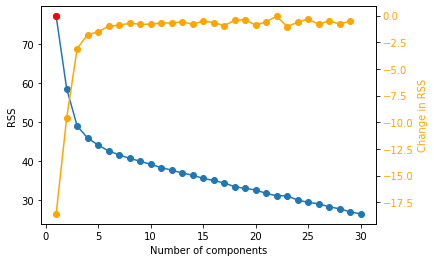

In [566]:
max_components=30

rss = []
for n in range(1, max_components+1):
    nmf = NMF(n_components=n)
    W = nmf.fit_transform(X)
    H = nmf.components_
    rss_n = nmf.reconstruction_err_
    rss.append(rss_n)
    
# Plot the RSS as a function of n_components
fig, ax = plt.subplots()
ax.plot(range(1, max_components+1), rss, '-o')
ax.set_xlabel('Number of components')
ax.set_ylabel('RSS')

# Plot the first derivative of the RSS
diff = np.diff(rss)
ax2 = ax.twinx()  # create a second y-axis
ax2.plot(range(1, max_components), diff, '-o', color='orange')
ax2.set_ylabel('Change in RSS', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

elbow_index = np.where(diff < np.mean(diff))[0][0]
optimal_n_components = elbow_index + 1
print(f"The optimal number of components is {optimal_n_components}")

ax.plot(optimal_n_components, rss[optimal_n_components-1], 'ro')
plt.show()


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  factorizations" <10.1587/transfun.E92.A.708>`


Best eps: 0.2
Best min_samples: 7
Best silhouette score: 0.24677618321302291
Number of clusters: 2


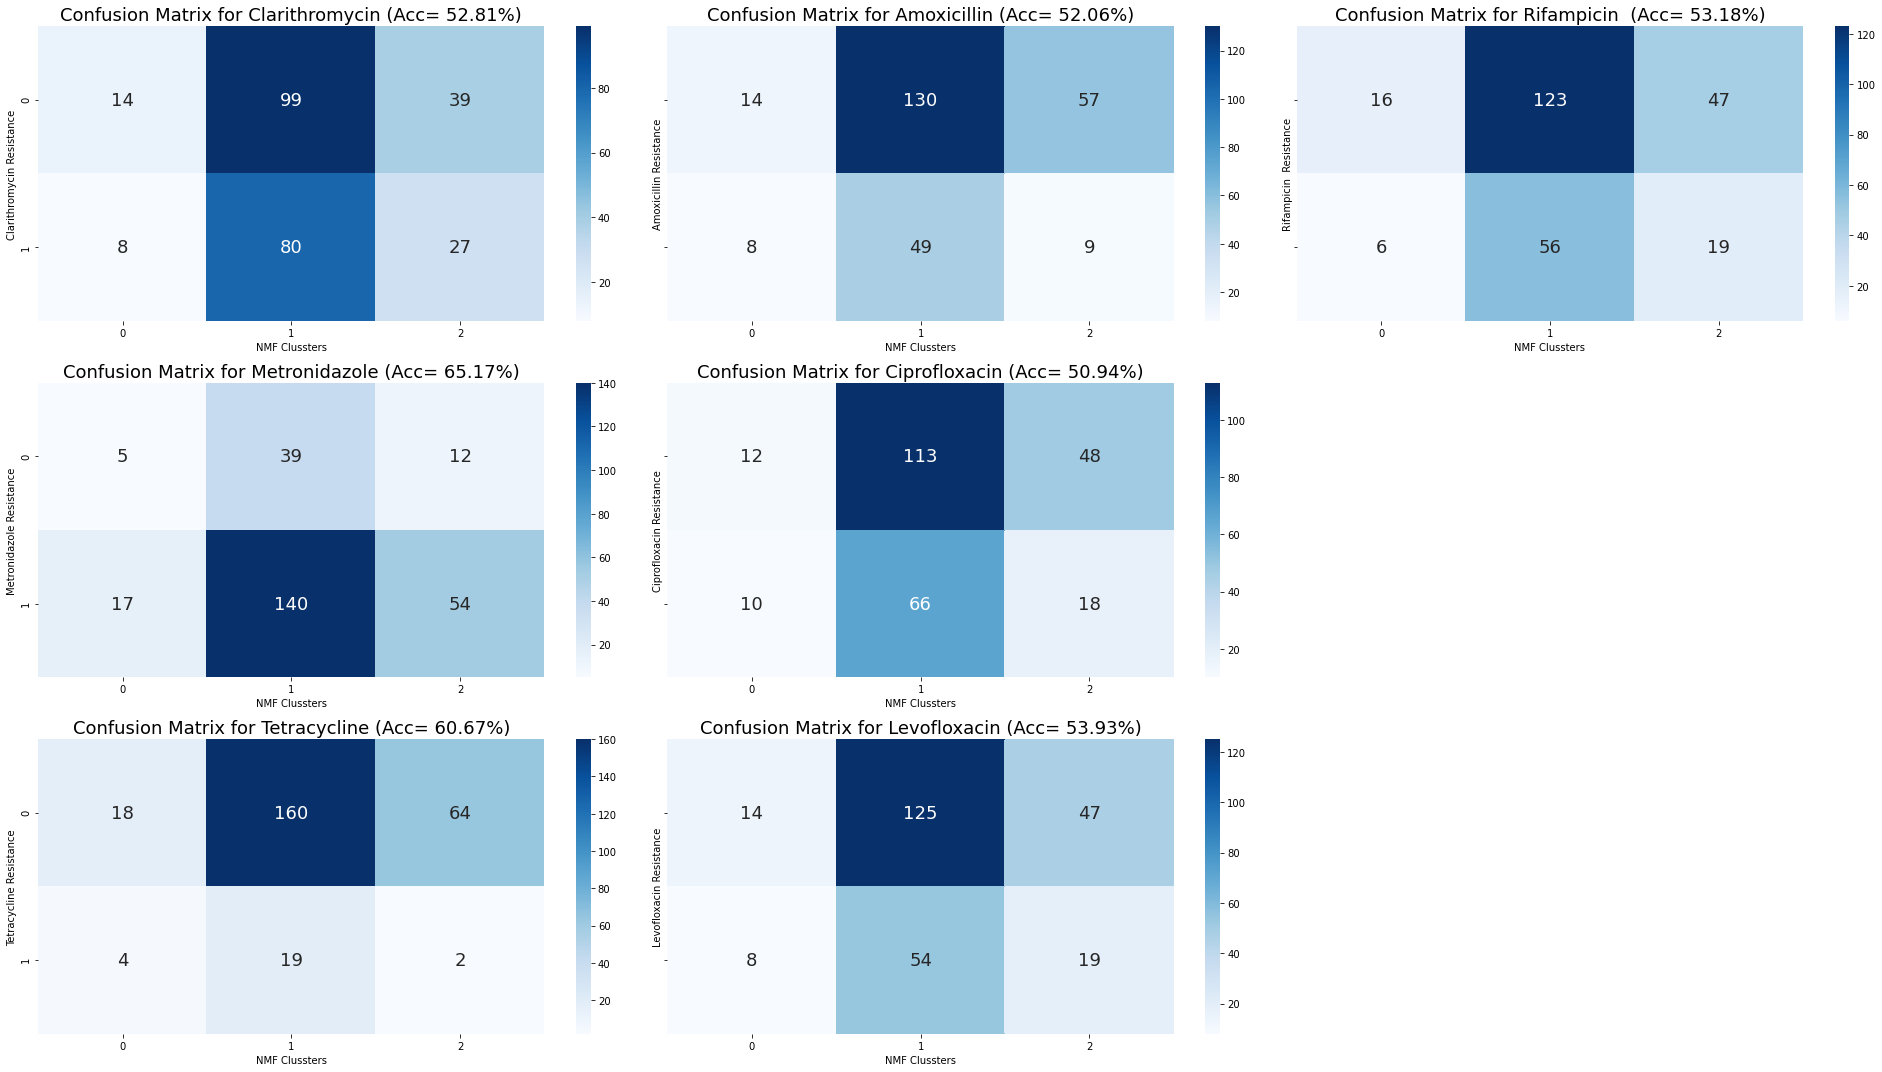

In [567]:
nmf = NMF(n_components=4)
nmf = nmf.fit_transform(X)
X_reduced = nmf[:, :4]


eps_range = np.linspace(0.1, 2.0, num=20)
min_samples_range = range(2, 10)

# Perform a grid search over the parameter values
best_score = -1
best_eps = None
best_min_samples = None

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_reduced)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if n_clusters > 1:
            score = silhouette_score(X_reduced, clusters)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# Print the best parameter values and the corresponding silhouette score
print('Best eps:', best_eps)
print('Best min_samples:', best_min_samples)
print('Best silhouette score:', best_score)

# Apply DBSCAN clustering with the best parameter values
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(X_reduced)

# Print the number of clusters
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print('Number of clusters:', n_clusters)

clusters = dbscan.fit_predict(X_reduced)


fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(27, 15), sharey=True)
x_axs = 0
y_axs = 0

drug_names = ['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin', 'Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']

for i, drug_name in enumerate(drug_names):

    drug_idx = y.columns.tolist().index(drug_name)
    y_true = y.iloc[:, drug_idx].astype(int).values

    cm = confusion_matrix(y_true, clusters)
    acc = accuracy_score(y_true, clusters)

    if acc<0.5:
        acc=1-acc

    cm = np.delete(cm, 0, axis=0)

    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=axs[x_axs,y_axs],
                annot_kws={"fontsize":18}
                #, xticklabels=['Out of Clusters','Cluster A', 'Cluster B'], yticklabels=['Sensitive', 'Resistant']
                )
    axs[x_axs,y_axs].set_xlabel('NMF Clussters')
    axs[x_axs,y_axs].set_ylabel('{} Resistance'.format(drug_name))
    axs[x_axs,y_axs].set_title('Confusion Matrix for {} (Acc= {}%)'.format(drug_name, round(acc*100,2)), fontsize=18)

    x_axs += 1
    if x_axs > 2:
        x_axs = 0
        y_axs += 1

axs[1,2].set_visible(False)
axs[2,2].set_visible(False)

plt.tight_layout()
plt.show()



### Create a Summary table of two clussterings: PCA-DBSCAN & NMF-DBSCAN

In [382]:
df['cluster_PCA_DBSCAN']=cluster_PCA_DBSCAN
df['cluster_NMF_DBSCAN']=cluster_NMF_DBSCAN
df.to_excel('PCAandNMF_DBSCAN.xlsx')

<ipython-input-382-98ba263a9a02>:3: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  df.to_excel('PCAandNMF_DBSCAN.xlsx')


In [396]:
corr = df.corr()

corr_cluster_PCA = corr['cluster_PCA_DBSCAN'].abs
high_corr_var=np.where(corr_matrix>0.2)

corr_cluster_PCA

<ipython-input-396-6167ce216daa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<bound method NDFrame.abs of Patient Age           0.002076
Clarithromycin        0.012968
Metronidazole        -0.005906
Tetracycline         -0.092156
Amoxicillin          -0.057841
                        ...   
virD4_cag5           -0.808365
wbcJ                  0.334977
ylxH                  0.133534
cluster_PCA_DBSCAN    1.000000
cluster_NMF_DBSCAN    0.915326
Name: cluster_PCA_DBSCAN, Length: 161, dtype: float64>

In [425]:
corr = df.corr()

corr_cluster_NMF = corr['cluster_NMF_DBSCAN']
corr_cluster_NMF_sorted = corr_cluster_NMF.sort_values(ascending=False)
corr_cluster_NMF_sorted=corr_cluster_NMF_sorted.to_frame()
corr_cluster_NMF_sorted=corr_cluster_NMF_sorted.dropna()
NMF_heatmap=corr_cluster_NMF_sorted[(corr_cluster_NMF_sorted['cluster_NMF_DBSCAN']<-0.5)  | (corr_cluster_NMF_sorted['cluster_NMF_DBSCAN']>0.5) ]  
NMF_heatmap

corr_cluster_PCA = corr['cluster_PCA_DBSCAN']
corr_cluster_PCA_sorted = corr_cluster_PCA.sort_values(ascending=False)
corr_cluster_PCA_sorted=corr_cluster_PCA_sorted.to_frame()
corr_cluster_PCA_sorted=corr_cluster_PCA_sorted.dropna()
PCA_heatmap=corr_cluster_PCA_sorted[(corr_cluster_PCA_sorted['cluster_PCA_DBSCAN']<-0.5)  | (corr_cluster_PCA_sorted['cluster_PCA_DBSCAN']>0.5) ]  
PCA_heatmap

<ipython-input-425-b3260b118c4a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


cluster_PCA_DBSCAN
cluster_PCA_DBSCAN            1.000000
cluster_NMF_DBSCAN            0.915326
cagP                         -0.537614
oipA_hopH                    -0.676458
cagF                         -0.682674
cag1                         -0.751918
cagU                         -0.754918
virB4_cagE                   -0.761005
cag3                         -0.765993
cagQ                         -0.786216
virB9_cagX                   -0.786216
cagM                         -0.792748
virB1_cag4                   -0.799089
virB5_cagL                   -0.802285
virB6_cagW                   -0.803549
virD4_cag5                   -0.808365
cagD                         -0.812933
cagS                         -0.812933
cagN                         -0.812933
cagG                         -0.819868
cagI                         -0.822317
virB7_cagT                   -0.826913
virB8_cagV                   -0.829199
virB2_cagC                   -0.836188
cagH                         -0.843287
cagZ                         -0.847219
virB11_9                     -0.848734

In [ ]:

corr_cluster_PCA = corr['cluster_PCA_DBSCAN']
corr_cluster_PCA_sorted = corr_cluster_PCA.sort_values(ascending=False)
corr_cluster_PCA_sorted=corr_cluster_PCA_sorted.to_frame()
corr_cluster_PCA_sorted=corr_cluster_PCA_sorted.dropna()
PCA_heatmap=corr_cluster_PCA_sorted[(corr_cluster_PCA_sorted['cluster_PCA_DBSCAN']<-0.5)  | (corr_cluster_PCA_sorted['cluster_PCA_DBSCAN']>0.5) ]  
PCA_heatmap

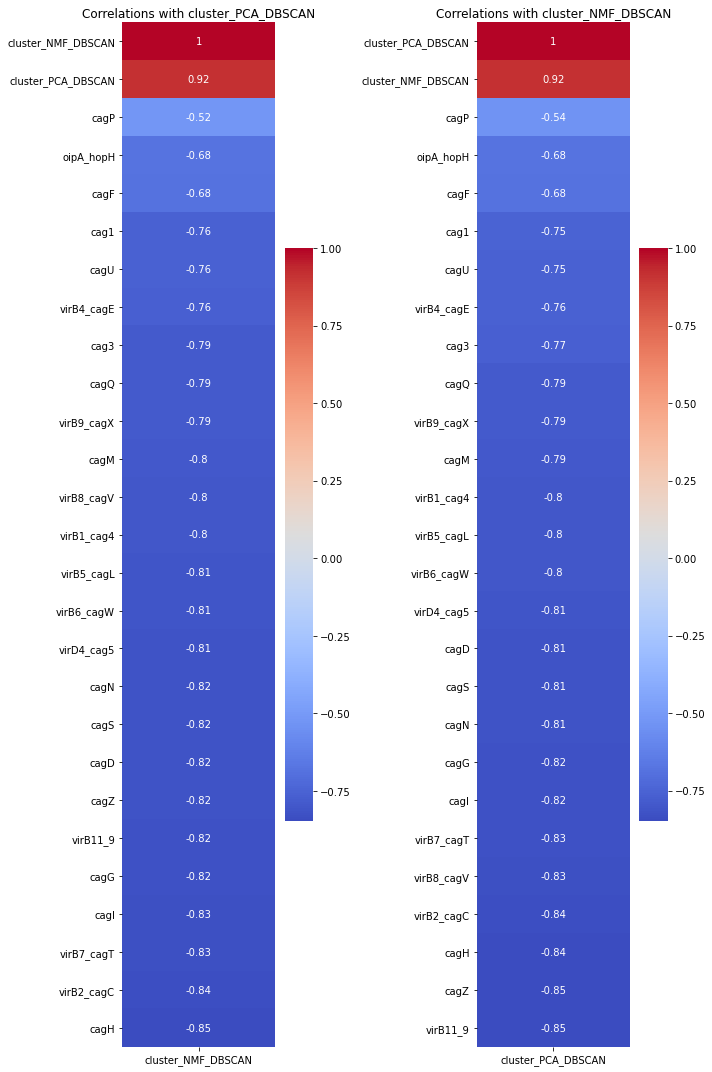

In [430]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 15))

sns.heatmap(NMF_heatmap, cmap='coolwarm', annot=True,ax=axs[0])
axs[0].set_title('Correlations with cluster_PCA_DBSCAN')

sns.heatmap(PCA_heatmap, cmap='coolwarm', annot=True,ax=axs[1])
axs[1].set_title('Correlations with cluster_NMF_DBSCAN')

plt.tight_layout()
plt.show()


In [387]:
corr_cluster

Patient Age           0.002076
Clarithromycin        0.012968
Metronidazole        -0.005906
Tetracycline         -0.092156
Amoxicillin          -0.057841
                        ...   
virD4_cag5           -0.808365
wbcJ                  0.334977
ylxH                  0.133534
cluster_PCA_DBSCAN    1.000000
cluster_NMF_DBSCAN    0.915326
Name: cluster_PCA_DBSCAN, Length: 161, dtype: float64

# Supervised ML

## Multi-output Feature Selection

## Multi-task learning

In [ ]:
from sklearn.linear_model import MultiTaskLasso

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

estimator = MultiTaskLasso()

param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'max_iter': [100, 1000, 10000],
}

grid_search = GridSearchCV(estimator, param_grid=param_grid)

grid_search.fit(X_train, y_train)

best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best estimator:\n", best_estimator)
print("Best hyperparameters:\n", best_params)
score = best_estimator.score(X_test, y_test)
print("Test score:", score)


Best estimator:
 MultiTaskLasso(alpha=0.1, max_iter=100)
Best hyperparameters:
 {'alpha': 0.1, 'max_iter': 100}
Test score: -0.02148841750282382


In [ ]:
#from pycaret.classification import *


list_of_y=['Clarithromycin', 'Metronidazole', 'Tetracycline', 'Amoxicillin','Ciprofloxacin', 'Levofloxacin', 'Rifampicin ']
i='Clarithromycin'

list_of_y.remove(i)
print(list_of_y)
df_ex=df.drop(columns=list_of_y)
#s = setup(data = df_ex, target = i, session_id=123)

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
import pycaret

ModuleNotFoundError: No module named 'pycaret'